# Определение факторов успешности видеоигр

Заказчик - интернет-магазин видеоигр, который продаёт по всему миру. Необходимо отработать механихм обработки данных, что позволит выявлять потенциально популярные продукты и соответствующе планировать рекламные кампании.

**Цель исследования** - Проанализировать исторические данные об играх из открытых источников, с целью выявления определяющие успешность игры закономерности. 

**Ход исследования**

Данные представлены в виде таблицы `games.csv`. Они содержат информацию о продажах игр, оценках пользователей и экспертов, жанров и игровых платформ выпуска, все данные датированы 2016-ым годом и ранее. При обзоре данных будет совершена проверка на возможные ошибки, которые могут помешать исследованию. После будет совершена предобработка данных с целью исправления ошибок и обработки пропущенных значений, при необходимости буду изменены типы данных и расчитаны дополнительные параметры. Затем на основе обработанных данных будет проведён исследовательский анализ данных, на основе которого будет составлен портрет пользователя из основных регионов. После будет совершена проверка сформированных заказчиком гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports отличаются. 

По результатам будет сформирован общий вывод.

Таким образом, исследование пройдёт в шесть этапов:

1. [**Обзор данных**](#overview)
2. [**Предобработка данных**](#pre-proc)
3. [**Исследовательский анализ данных**](#analysis)
4. [**Портрет пользователя в зависимости от региона**](#user-port)
5. [**Проверка гипотез**](#hypothesis)
6. [**Общий вывод**](#conclusion)

<a id='overview'></a>

## Обзор данных

Импортируем данные из таблицы и проводим обзор:

In [1]:
# импортируем библиотеки для работы с данными

import os
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None
sns.set_style('dark')
plt.rcParams.update({'axes.labelsize': 10,'axes.titlesize': 15})
os.chdir('C:\\Users\\dmitr\\GitHub\\Practicum-Data-Analysis\\datasets')

In [2]:
data = pd.read_csv('games.csv') # импортируем таблицу
data.info() # выводим общую информацию
display(data.sample(10)) # 10 случайных строк из таблицы

print('missing values:')
data.isna().sum() # сумма пропусков в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6911,NBA Live 14,PS4,"2,013.00",Sports,0.15,0.05,0.00,0.04,43.00,2.7,E
3332,MonHun Nikki: Poka Poka Ailu Mura,PSP,"2,010.00",Role-Playing,0.00,0.00,0.60,0.00,NaN,NaN,NaN
12614,Starry ? Sky: In Summer,PSP,"2,010.00",Misc,0.00,0.00,0.06,0.00,NaN,NaN,NaN
13057,Kamen Rider: Dragon Knight,DS,"2,009.00",Fighting,0.05,0.00,0.00,0.00,NaN,tbd,T
16499,Sherlock Holmes: The Devil's Daughter,PS4,"2,016.00",Adventure,0.01,0.00,0.00,0.00,70.00,6.8,T
8422,Dragon Quest X,3DS,"2,014.00",Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
7037,Carnival Island,PS3,"2,011.00",Misc,0.13,0.06,0.00,0.04,66.00,5.2,E
3181,NBA Live 08,PS3,"2,007.00",Sports,0.56,0.02,0.01,0.05,73.00,6.8,E
15621,Rozen Maiden: Duellwalzer,PS2,"2,006.00",Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5718,Fate/Extra,PSP,"2,010.00",Role-Playing,0.18,0.01,0.10,0.03,58.00,8.1,T


missing values:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<a id='note'></a>

**Согласно информации от заказчика, данные за 2016-ый год могут быть неполными, что должно быть учтено в исследовании.** 

Таблица содержит 11 столбцов, 16,715 срок в каждом. Данные представлены двумя типами - `float64` и `object`.

Описание данных из документации:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

---
**Выводы**

* Названия столбцов записаны с использованием разных регистров, что может усложнить индексацию данных из отдельных столбцов.
* Больше половины столбцов содержат пропущенные значения.
* `Year_of_Release` содержит год выпуска в виде дробных чисел.
* `Critic_Score` содержит дробные числа, хотя рейтинги не содержат знаки после запятой.
* `User_Score` содержит числовые данные в виде `object`.
* Для экономии памяти все данные типа `float64` можно привести к `float32`.

<a id='pre-proc'></a>

## Предобработка данных

Перед началом исследования необходимо изучить столбцы на предмет аномальных и пропущенных значений, а также поменять тип данных. Для этого рассмотрим каждый столбец датасета по отдельности. Для оптимизации процесса создадим функцию `overview` , которая будет выводить описательную статистику и проверять наличие пропущенных значений.
Поскольку большинство изменений типа данных в таблице будет заключаться в приведении к целому числу или упрощению дробей, мы также напишем функции `into_int`,`into_float` и `into_cat`, которые будут менять тип данных на `int32` или `int64`. Замена данных на другие типы, при необходимости, будет проводится вручную.

In [3]:
original = data # на всякий случай сделаем переменную с сырым датасетом
data.columns = data.columns.str.lower() # приведём названия столбцов к нижнему регистру

# создадим список с названиями колонок
# колонок в таблице много, потому для удобства работы с функциями
# аргументом будет являтся индекс этого списка

col = data.columns.tolist() # список названий столбцов


# функции возвращают датафрейм, преобразовав данные заданного столбца в `int32` или `int64`. 

def into_int(index):
    return data.astype({(col[index]): 'int32'})

def into_float(index):
    return data.astype({(col[index]): 'float32'})


# функция "overview" выведет описательную статистику данных столбца.
# если есть пропуски - выведет их количество и процентную долю от общего числа значений
# а также корреляцию с другими данными 

def overview(index):
    column = data[col[index]]
    na = column.isna().sum() # количество пропусков
    
    print(column.describe()) # описательная статистика
    print(f'data type - {column.dtypes}') # тип данных столбца
    
    if na > 1: # если есть пропуски:
        
        print()
        print(f'cells with missing data = {na}') # количества пропусков, если они есть
        print(f'missing data share = {round(na/len(column)*100, 2)}%') # доля пропусков в %
        
        if column.dtypes != 'O' and column.dtypes != 'object': # если у данных числовой тип:
            corr = (data.corr()[col[index]].sort_values(ascending=False).head()) # корреляция с данными других столбцов
            corr.plot(title='dataset correlation', figsize=[8,3], style='mo:') # простой график корреляции
            plt.grid()
            plt.show()

# опробуем функцию overview на столбце с названиями игр

try:
    overview(0)
    
except:
    print('Функция не сработала.') 

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object
data type - object

cells with missing data = 2
missing data share = 0.01%


На 16,713 ячеек всего 11,559 уникальных значений - значит названия игр повторяются. Посмотрим на данные игры, встречающуюся чаще всего - "Need for Speed: Most Wanted".

In [4]:
data[data['name'] == 'Need for Speed: Most Wanted'] # выведем данные по названию игры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,"2,005.00",Racing,2.03,1.79,0.08,0.47,82.00,9.1,T
523,Need for Speed: Most Wanted,PS3,"2,012.00",Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1998,Need for Speed: Most Wanted,XB,"2,005.00",Racing,0.53,0.46,0.00,0.05,83.00,8.8,T
2048,Need for Speed: Most Wanted,PSV,"2,012.00",Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,"2,005.00",Racing,0.43,0.11,0.00,0.02,80.00,9.1,T
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
6273,Need for Speed: Most Wanted,WiiU,"2,013.00",Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,"2,005.00",Racing,0.24,0.01,0.00,0.02,45.00,6.1,E


Согласно <a href="https://en.wikipedia.org/wiki/Need_for_Speed:_Most_Wanted_(2012_video_game)">статье</a> на wikipedia.org, игра 2012-го года является перезапуском (новой версией) <a href="https://en.wikipedia.org/wiki/Need_for_Speed:_Most_Wanted_(2005_video_game)">игры 2005-го года</a> . Та же игра вышла на платформе "WiiU" на год позже. Получатеся, что эти 12 строк - это 2 игры, на разных платформах. Поскольку на каждой платформе отдельно считаются продажи, пользовательский рейтинг и оценки критиков (а иногда даже рейтинг ESRB), объединять информацию об играх нецелесообразно. Удалим строки с пропущенными значениями (0.01% данных не повлияет на исследование), а затем перейдём к следующему столбцу.

In [5]:
# переименуем Need for Speed, чтобы не путаться

data[data['year_of_release'] > 2005] = (
    data[data['year_of_release'] > 2005]
    .replace('Need for Speed: Most Wanted', 
             'Need for Speed: Most Wanted (2012)')
)

# пересохраняем таблицу без пропусков в `name`

data = data[data['name'].notna()] 
overview(0)

count                        16713
unique                       11560
top       LEGO Marvel Super Heroes
freq                             9
Name: name, dtype: object
data type - object


In [6]:
overview(1) # смотрим на таблицу с игровыми платформами

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object
data type - object


Проверим уникальность каждого значения:

In [7]:
data['platform'].value_counts() # выведем список уникальных значений

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Дубликатов не обнаружено. Количество значений каждой платформы явно растёт с не только в связи с её популярностью, но и её актуальностью - например, платформа <a href="https://en.wikipedia.org/wiki/PC-FX">PCFX</a>  была выпущена в 1994-ом году, а <a href="https://en.wikipedia.org/wiki/Nintendo_DS">Nintendo DS</a> из начала списка - в 2004-ом. 

Теперь мы можем проверить полные дубликаты в таблице по связке "платформа - название игры":

In [8]:
data[data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
1745,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


Получили список из двух задублированных игр, но это не полные дубликаты - в записях отличаются данные о продажах по Европе. Возможно по каким-то причинам данные об играх разделились, потому эти продажи не стоит отбрасывать. Суммируем данные, после чего избавимся от дубликатов:

In [9]:
# суммируем продажи задублированных игр

data.loc[604, 'eu_sales'] = (
    data.loc[604, 'eu_sales'] +
    data.loc[16230, 'eu_sales']
)

data.loc[1745, 'eu_sales'] = (
    data.loc[1745, 'eu_sales'] +
    data.loc[4127, 'eu_sales']
)

# удаляем дубликаты

data = (
    data
    .drop_duplicates(
        subset=['name', 'platform'])
    .reset_index(drop=True)
)

Переходим к следующему столбцу:

count   16,443.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64
data type - float64

cells with missing data = 268
missing data share = 1.6%


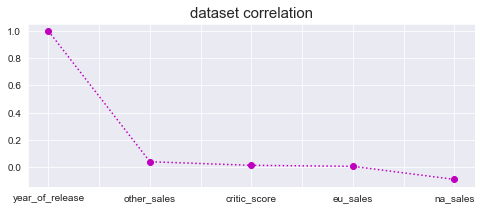

In [10]:
overview(2) # год выпуска

Данные содержат информацию об играх, выпущенных с 1980 по 2016 годы. Поскольку значительной корреляции с другими данными не наблюдается, а для приведения значений к целому числу необходима обработка пропусков, строки с пропущенными данными будет лучше удалить. Так их доля в датасете незначительна, это не повлияет на результаты исследования. Затем поменяем тип данных и перейдём дальше:

In [11]:
data = data[data['year_of_release'].notna()] # пересохраняем таблицу без пропусков в `year_of_release`
data = into_int(2) # меняем тип данных на целочисленный

overview(2) # снова смотрим на данные столбца

count   16,443.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64
data type - int32


In [12]:
overview(3) # жанр

count      16443
unique        12
top       Action
freq        3307
Name: genre, dtype: object
data type - object


Проверим уникальность каждого значения:

In [13]:
data['genre'].value_counts() # выведем список уникальных значений

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Данные в порядке, можем идти дальше:

In [14]:
overview(4) # продажи в Северной Америке(в млн. проданных копий)

count   16,443.00
mean         0.26
std          0.82
min          0.00
25%          0.00
50%          0.08
75%          0.24
max         41.36
Name: na_sales, dtype: float64
data type - float64


Данные не вызывают сомнений - нулевые значения могут означать, что игра не выпускалась на рынок конкретного региона, или же просто плохо продавалась. Посмотрим другие регионы:

In [15]:
overview(5) # продажи в Европе (в млн. проданных копий)

count   16,443.00
mean         0.15
std          0.51
min          0.00
25%          0.00
50%          0.02
75%          0.11
max         28.96
Name: eu_sales, dtype: float64
data type - float64


In [16]:
overview(6) # продажи в Японии (в млн. проданных копий)

count   16,443.00
mean         0.08
std          0.31
min          0.00
25%          0.00
50%          0.00
75%          0.04
max         10.22
Name: jp_sales, dtype: float64
data type - float64


In [17]:
overview(7) # продажи в остальных регионах (в млн. проданных копий)

count   16,443.00
mean         0.05
std          0.19
min          0.00
25%          0.00
50%          0.01
75%          0.03
max         10.57
Name: other_sales, dtype: float64
data type - float64


В других регионах ситуация такая же. Очевидно Северная Америка, Европа и Япония являются настолько большими регионами потребления, что весь остальной мир объединен в одну отдельную категорию. Сократим размер данных и перейдём дальше:

In [18]:
data = into_float(4) # Северная Америка
data = into_float(5) # Европа
data = into_float(6) # Япония
data = into_float(7) # другие регионы

count   7,982.00
mean       68.99
std        13.92
min        13.00
25%        60.00
50%        71.00
75%        79.00
max        98.00
Name: critic_score, dtype: float64
data type - float64

cells with missing data = 8461
missing data share = 51.46%


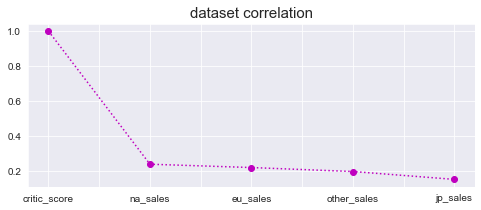

In [19]:
overview(8) # оценка критиков

В таблице пропущенно больше половины значений. От оценок критиков можно было бы ожидать корреляции с оценками пользователей (на данный момент не расчитывается из-за некорректного типа данных столбца `user_score`), которую можно было бы использовать для заполнения пропущенных данных медиаными значениями. Этот метод подходит для ситуации с технической природой отсутствия пропусков (ошибки выгрузки, например), но здесь скорее всего пропуски оправданы - игры могли оцениваться только для конкретных платформ, или же не оцениваться вовсе в связи маленьким тиражом или выпуском только на локальном рынке. Потому пропущенные значения остануться как есть. Меняем тип данных и переходим дальше:

In [20]:
data = into_float(8)

In [21]:
overview(9) # пользовательский рейтинг

count     9838
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object
data type - object

cells with missing data = 6605
missing data share = 40.17%


Самым частым значением является `tbd` (*англ*. "To be determined", *букв*. "Подлежит определению") - видимо это и есть причина сохранения данных в формате `object`. В рамках исследования `tbd` значит то же, что и пропущенные значения.

count   7,462.00
mean        7.13
std         1.50
min         0.00
25%         6.40
50%         7.50
75%         8.20
max         9.70
Name: user_score, dtype: float64
data type - float32

cells with missing data = 8981
missing data share = 54.62%


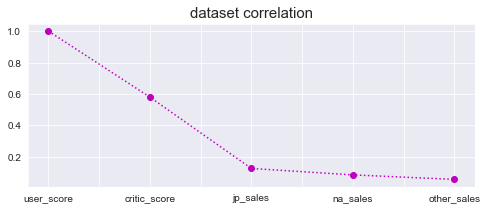

In [22]:
# заменим `tbd` на пропуски
    
data['user_score'] = (
    data['user_score']
    .replace('tbd', np.NaN)
)

data = into_float(9) # меняем тип данных
overview(9) # снова смотрим на данные

Предположение о наличии корреляции с оценками критиков подтвердилось - коэффициент Пирсона составляет `0.6`, что соответствует среднему уровню взаимосвязи данных. Но заполнение пропусков тут также нецелесообразно - причины их возникновения явно идентичны ситуции с оценками критиков. Оставим пропуски как есть и перейдём к последнему столбцу:

In [23]:
overview(10) # рейтинг ESRB

count     9767
unique       8
top          E
freq      3920
Name: rating, dtype: object
data type - object

cells with missing data = 6676
missing data share = 40.6%


Пропуски в таблице оправданы - официально организация ESRB признана и полноценно функционирует только на территории Северной Америки, соответственно у игр, выпущенных исключительно на других рынках, рейтинг может отсутствовать.

In [24]:
data['rating'].value_counts() # выведем список уникальных значений

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Согласно <a href="https://www.esrb.org/ratings-guide/">гайду по рейтингам</a> с официального сайта ESRB:

* **E** - Everyone (для всех возрастов)
* **T** - Teen (13+)
* **M** - Mature (17+)
* **E10+** Everyone 10+ (10+)
* **EC** - Early Childhood (больше не используется, заменён на **E**)
* **K-A** - Kids-Adults (больше не используется, заменён на **E**)
* **AO** - Adults Only (18+)
* **RP** - Raiting Pending (рейтинг не присвоен, используется для рекламы, до выпуска игры в продажу рейтинг обязательно меняется) 


Таким образом, в таблице встречаются игры с устаревшими рейтингами (**EC** и **K-A**), что вероятнее всего обусловлено их годом выпуска. В рамках проекта эти рейтинги можно заменить на актуальные для более точной картины исследования:

Посмотрим на единственную игру с рейтингом **RP**:

In [25]:
data[data['rating']=='RP'] # игра без рейтинга

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14267,Supreme Ruler: Cold War,PC,2011,Strategy,0.00,0.03,0.00,0.01,63.00,6.80,RP


Согласно <a href="https://www.esrb.org/ratings/31253/Supreme+Ruler+Cold+War/">странице игры</a> на ESRB, официальный рейтинг после релиза - **E**:

Посмотрим теперь на единственную игру с рейтингом **AO**:

In [26]:
data[data['rating']=='AO'] # игра с рейтингом АО

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
874,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93.00,8.60,AO


У этой игры <a href="https://en.wikipedia.org/wiki/Hot_Coffee_(minigame)#cite_note-13">очень интересная история</a> присвоения рейтинга ESRB. Если вкратце: изначально рейтинг был **M**, затем изменён на **AO**, а после правок контента со стороны издателя - снова был изменён на **M**, который и является актуальным рейтингом на данный момент. 

Актуализируем все рейтинги и сновы выведем список уникальных значений столбца:

In [27]:
# актуализируем рейтинги

data['rating'] = (
    data['rating']
    .replace({'EC':'E', 
              'K-A':'E', 
              'RP':'E', 
              'AO':'M'})
)

# заполним пропуски

data['rating'] = (
    
    data['rating']
    .fillna('No rating')
)

# снова выведем список уникальных значений    
    
data['rating'].value_counts()

No rating    6676
E            3932
T            2905
M            1537
E10+         1393
Name: rating, dtype: int64

Создадим дополнительный столбец с суммарными продажами по всем регионам и повторим обзор данных общей таблицы:

In [28]:
# столбец с общемировыми продажами

data['total_sales'] = (
    data[['na_sales',
          'eu_sales',
          'jp_sales', 
          'other_sales']]
    .sum(axis=1)
)

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16707,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No rating,0.01
16708,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No rating,0.01
16709,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No rating,0.01


In [29]:
data.info() # выводим общую информацию
display(data.sample(10)) # 10 случайных строк из таблицы

print('missing values:')
data.isna().sum() # сумма пропусков в каждом столбце

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float32
 5   eu_sales         16443 non-null  float32
 6   jp_sales         16443 non-null  float32
 7   other_sales      16443 non-null  float32
 8   critic_score     7982 non-null   float32
 9   user_score       7462 non-null   float32
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float32
dtypes: float32(7), int32(1), object(4)
memory usage: 1.1+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1772,Dragon Quest I & II,SNES,1993,Role-Playing,0.00,0.00,1.15,0.00,NaN,NaN,No rating,1.15
7894,Nobunaga no Yabou: Souzou,PS3,2013,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,No rating,0.19
16062,Dream C Club,PS3,2012,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,No rating,0.02
11402,Pimp My Ride: Street Racing,PS2,2009,Racing,0.04,0.03,0.00,0.01,NaN,NaN,No rating,0.08
10355,Naruto Shippuden: Naruto vs. Sasuke,DS,2008,Action,0.07,0.00,0.03,0.00,64.00,NaN,E10+,0.10
13717,Civilization Beyond Earth: Rising Tide,PC,2015,Strategy,0.00,0.04,0.00,0.00,NaN,NaN,No rating,0.04
15258,Castlevania: Lords of Shadow - Reverie,X360,2011,Action,0.02,0.00,0.00,0.00,NaN,NaN,No rating,0.02
8429,25 to Life,XB,2006,Shooter,0.12,0.04,0.00,0.01,41.00,7.20,M,0.17
6373,The Sims 2: Pets,GC,2006,Simulation,0.21,0.05,0.00,0.01,66.00,7.30,T,0.27
10886,MotoGP,XB,2002,Racing,0.07,0.02,0.00,0.00,84.00,8.40,E,0.09


missing values:


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

### Вывод

В начале предобработки данных сырой датасет был сохранён в переменную `original`. Сравним первоначальные и измененные в ходе обработки данные:

In [30]:
# посчитаем разницу в количестве пропусков, строк и используемых ресурсов памяти

na_diff = (
    round((original.isna().sum().sum()-
           data.isna().sum().sum())/
          original.isna().sum().sum()*100, 2)
)

size_diff = (
    round((len(original)-
           len(data))/
          len(original)*100, 2)
)

memory_diff = round((3.7-3)/3*100, 2)


print(f'В ходе предобработки данных было обработано {na_diff}% пропущенных значений.\
 Было удалено {size_diff}% датасета, при этом удалось \n сократить использование памяти на {memory_diff}%.')

В ходе предобработки данных было обработано 21.85% пропущенных значений. Было удалено 1.63% датасета, при этом удалось 
 сократить использование памяти на 23.33%.


При обработке данных удалось заполнить пятую часть всех пропусков, а также сохранить большую часть исходных данных, а за счёт изменения типов - значительно сократить используемые ресурсы памяти.
_______
**Что было отмечено при работе с данными:**

* Данные содержат информацию об играх, выпущенных с 1980 по 2016 годы.

* Для мультиплатформеных игр отдельно считаются продажи, пользовательский рейтинг и оценки критиков (а иногда даже рейтинг ESRB) для каждой платформы, что делает объединение информации об играх нецелесообразным. К тому же на разных платформах одна и та же игра могла выходить в разные годы.

* Количество игр на каждой платформы явно растёт с не только с её популярностью, но и её актуальностью - например, платформа <a href="https://en.wikipedia.org/wiki/PC-FX">PCFX</a>  была выпущена в 1994-ом году и представляют только одну игру в таблице, а <a href="https://en.wikipedia.org/wiki/Nintendo_DS">Nintendo DS</a> была выпущена в 2004-ом и представляет уже 2,151 игру. 

* Нулевые значения в данных о продажах в разрезе регионов могут означать, что игра не выпускалась на рынок конкретного региона, или же просто плохо продавалась.

* Северная Америка, Европа и Япония являются крупнейшими рынками сбыта видеоигр, весь остальной мир объединен в одну отдельную категорию.

* Отсутствие оценок критиков и пользовательских рейтингов оправдано тем, что игры могли оцениваться только для конкретных платформ, или же не оцениваться вовсе в связи маленьким тиражом или выпуском только на локальном рынке. Коэффициент корреляции между имеющимися значениями этих столюцов составляет `0.6`, что соответствует среднему уровню взаимосвязи данных.

* Отсутствие рейтинга ESRB для некоторых игр оправдано тем, что официально организация ESRB признана и полноценно функционирует только на территории Северной Америки. Соответственно у игр, выпущенных эксклюзивно для рынков других регионов, рейтинг может отсутствовать. Также в таблице встречаются игры с устаревшими рейтингами (**EC** и **K-A**),  что вероятнее всего обусловлено их годом выпуска, а также неактульные для конкретных игр (**AO** и **RP**). В рамках проекта эти рейтинги были заменены на актуальные для более точной картины исследования.

<a id='analysis'></a>

## Исследовательский анализ данных

В ходе анализа мы рассмотрим динамику продаж для различных платформ. Основные этапы:
* Определить актуальный период времени для исследования данных, основываяь на рассмотрение динамики продаж по годам и установлении примерного жизнененого цикла платформы. 
* Определение потенциально прибыльных платформ по результатам анализа динамики продаж.
* Исследовать влияние оценок критиков и пользовательского рейтинга на уровень продаж с помощью расчёта корреляции.
* Оценить прибыльность игр в разрезе жанров.

### Установление актуального периода для исследования
В ходе предобработки данных удалось установить, что годы выпуска игр в датасете - с 1980-го по 2016-ый. Соответственно, для составления наиболее актуальных прогнозов, необходимо установить актуальный период для анализа. Для начала посмотрим, сколько игр выпускалось каждый год:

<a id='games_per_year'></a>

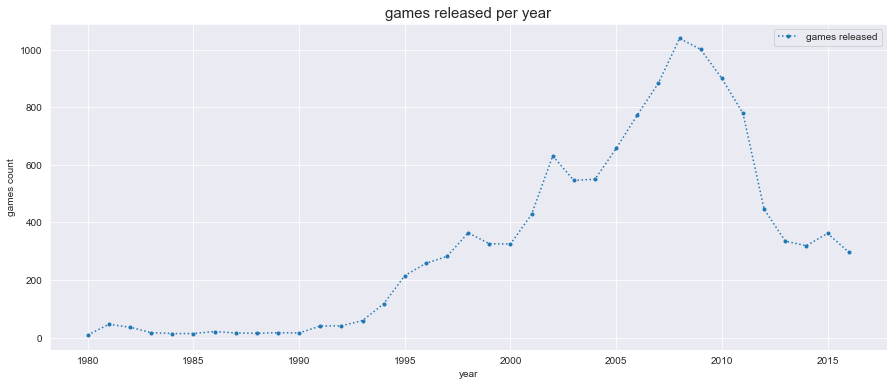

In [31]:
# визуализируем количество изданных игр по годам

(data
 .pivot_table(
     index='year_of_release', 
     values='name', 
     aggfunc='nunique')
 .rename(
     columns={'name':'games released'})
 .plot(
     style='.:', 
     figsize=[15,6], 
     ylabel='games count', 
     xlabel='year', 
     title='games released per year')
)
plt.grid()
plt.show()

График позывает стабильный рост количества изданных игр с 1990-го года, доистигая пика в ~1,000 изданных игр в 2008-ом, после чего начинается резкий спад. Исторически лучший период - с 2005-го по 2010-ый. Для дальнейшего исследования установим 1990-ый год как нижний порог.

Теперь изучим объёмы общих продаж по всему региону в разрезе игровых платформ - опредилим топ платформ по количеству продаж и рассмотрим их динамику продаж по годам:

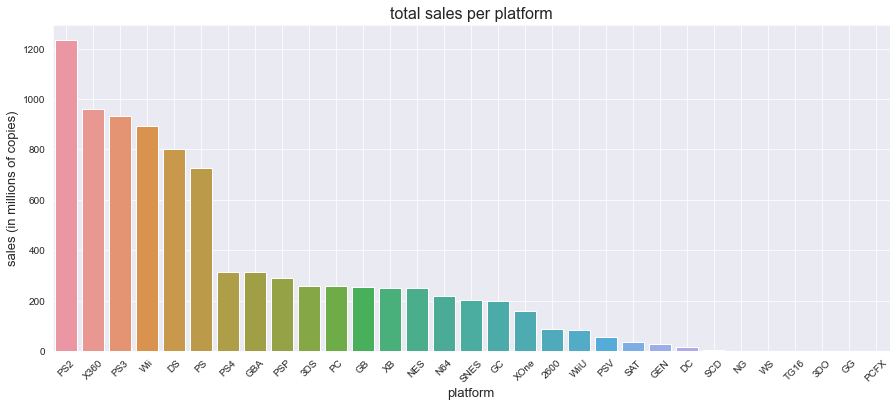

In [32]:
# визуализируем количество продаж по игровым платформам

platform_sales = (
    data
    .pivot_table(
        index='platform', 
        values='total_sales', 
        aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)


plt.figure(figsize=(15,6))

sns.barplot(
    x=platform_sales.index, 
    y = platform_sales['total_sales']
)

plt.title('total sales per platform', fontsize=16)
plt.xlabel('platform', fontsize=13)
plt.xticks(rotation=45)
plt.ylabel('sales (in millions of copies)', fontsize=13)
plt.grid()
plt.show()

Первые шесть платформ явно лидируют с большим отрывом - их и используем для анализа:

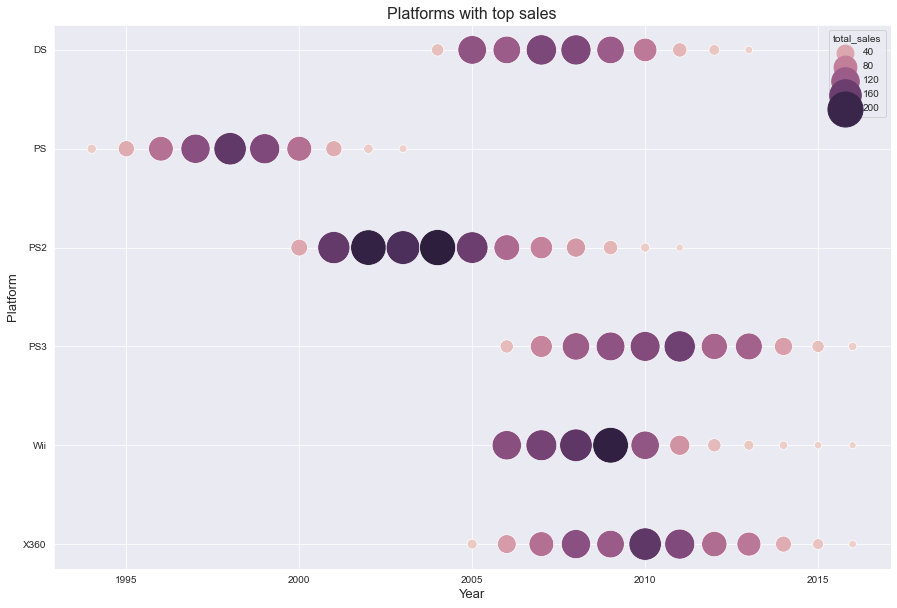

In [33]:
# отберём данные платформ с самыми высокими продажами из общего датасета
# с помощью сводной таблицы по продажам 
# (используем список топ-платформ как фильтр для общей таблицы)

top_selling_platforms = (
    
    data[data['platform']
         .isin(platform_sales
               .reset_index()
               .query('total_sales > 400')['platform']
               .to_list()
              )]
    .reset_index(drop=True)
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .reset_index()
)

# визуализируем результат отбора данных

plt.figure(figsize=[15,10])

sns.scatterplot(data=top_selling_platforms
                .query('year_of_release > 1990'),
                x='year_of_release', 
                y='platform', 
                hue='total_sales', 
                size='total_sales',
                sizes=(50,1300),
               )

plt.title('Platforms with top sales', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Platform', fontsize=13)
plt.grid()
plt.show()

* Жизненый цикл игровой платформы длится около 10 лет, пик продаж приходится примерно на его середине.
* До 2005-го года на отрезках в 5 лет представлена только одна топ-платформа, после же начинается конкуренция между несколькими платформами одновременно.
* Актуальность всех расматриваемых платформ заканчивается в 2015-ом году. Поскольку данные в таблице ограниченны 2016-ым годом, современные платформы ещё не успели набрать значительную аудиторию, а потому не присутствует в топе по количеству проданных игр.

Ограничим данные до 2013-го года - к этому году уже начался значительный спад популярности платформ на графике выше, что косвенно указывает на выпуск их более новых версий или других новых платформ. Полученный период в 3 года будет показывать расцвет самых новых платформ. Для актуальных прогнозов более ранние данные не принесут пользы.

In [34]:
data = data.query('year_of_release >= 2013').reset_index(drop=True) # убираем данные до 2013-го годаи

-------
Таким образом, актуальным периодом для исследование является **2013-2016 годы**.

### Определение потенциально прибыльных платформ

Определим потенциально прибыльные платформы как находящиеся в начале или середине своего жизненого цикла. На предыдущем графике мы выясняли, что шесть самых продаваемых платформ уже потеряли свою актуальность к 2016-ому году, потому мы их не будем рассматривать. Визуализируем динамику продаж игр по остальным платформам:

<a id='platform_sales'></a>

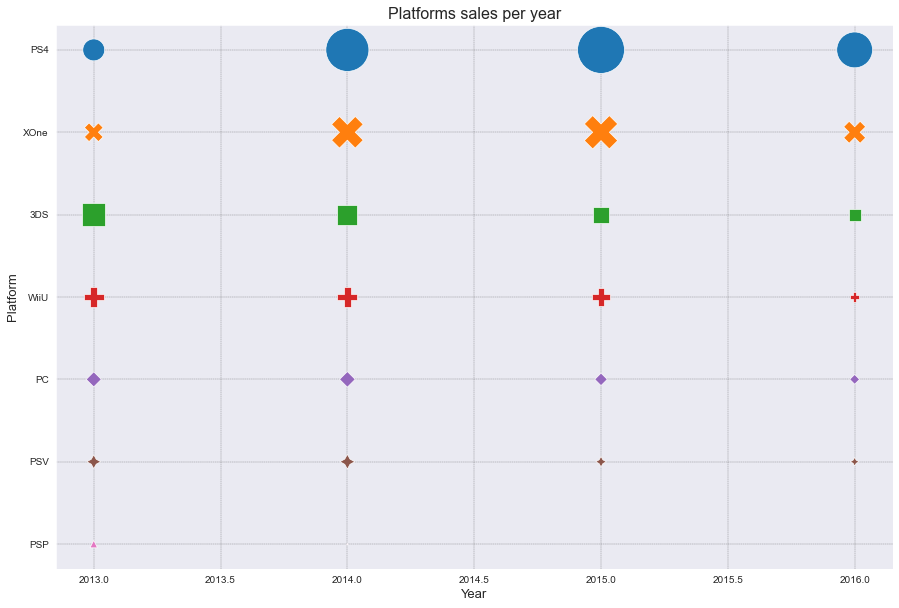

In [35]:
# создадим датафрейм с данными потенциально прибыльных платформ 

potential_df = (
    data[~data['platform']
         .isin(top_selling_platforms['platform']
               .unique().tolist())]
    .pivot_table(index=['platform', 'year_of_release'],
                 values='total_sales', aggfunc='sum')
    .sort_values(['total_sales'], ascending=False)
    .reset_index()
)

# визуализируем динамику продаж оставшихся платформ

plt.figure(figsize=[15,10])

sns.scatterplot(data=potential_df,
                x='year_of_release', 
                y='platform', 
                style='platform',
                hue='platform',
                size='total_sales',
                sizes=(0,2200),
                legend=False,
               )

plt.title('Platforms sales per year', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Platform', fontsize=13)
plt.grid(color='k', linestyle='-.', linewidth = 0.2)
plt.show()

<a id='platforms'></a>

К 2016-му году актуальными остаются всего 6 платформ:

 * <a href="https://en.wikipedia.org/wiki/PlayStation_4">**PS4**</a>
 * <a href="https://en.wikipedia.org/wiki/Nintendo_3DS">**Nintendo 3DS**</a>
 * <a href="https://en.wikipedia.org/wiki/Xbox_One">**Xbox One**</a>
 * <a href="https://en.wikipedia.org/wiki/PC_game">**PC**</a>
 * <a href="https://en.wikipedia.org/wiki/Wii_U">**Nintendo WiiU**</a>
 * <a href="https://en.wikipedia.org/wiki/PlayStation_Vita">**PS Vita**</a>

Даже несмотря на то, что данные за 2016 могут быть неполными, актуальность этих платформ подтверждается не только объёмами продаж, но и динамикой роста/падения, а также этапом жизненного цикла.

* Первые три платформы являются самыми новыми в выборке и явно лидируют по глобальным продажам в последние годы, что делает их потенциально прибыльными в будущем. 

* Последние две также достаточно новые, но не достигают больших объёмов глобальных продаж или впечатляющих темпов роста - возможно картина в разрезе локальных рынков будет отличаться. 

* У компьютера в качестве игровой платформы (PC) очень интересная динамика - она радикально не меняется на протяжении нескольких лет. Попробуем также рассмотреть его потенциальную прибыльность.



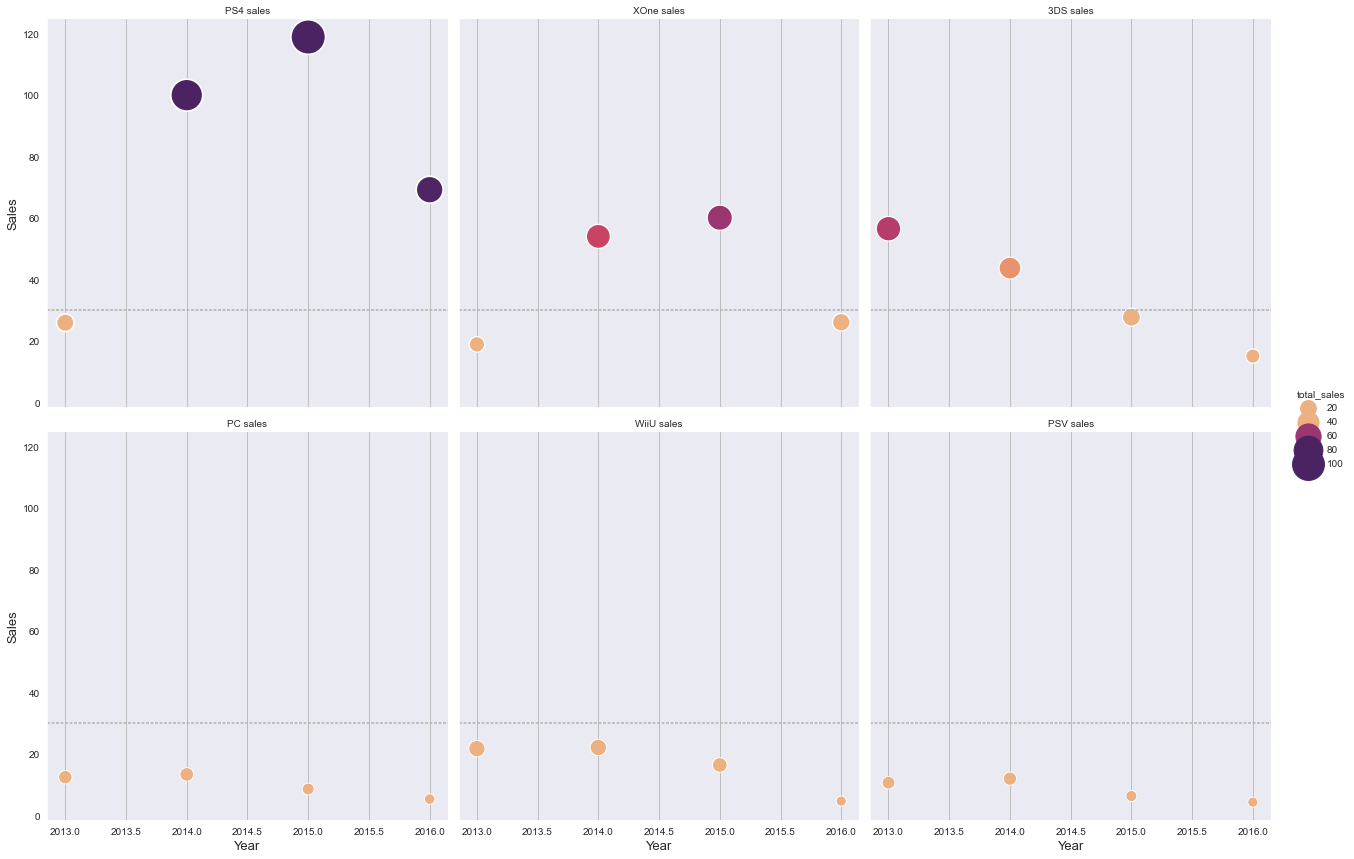

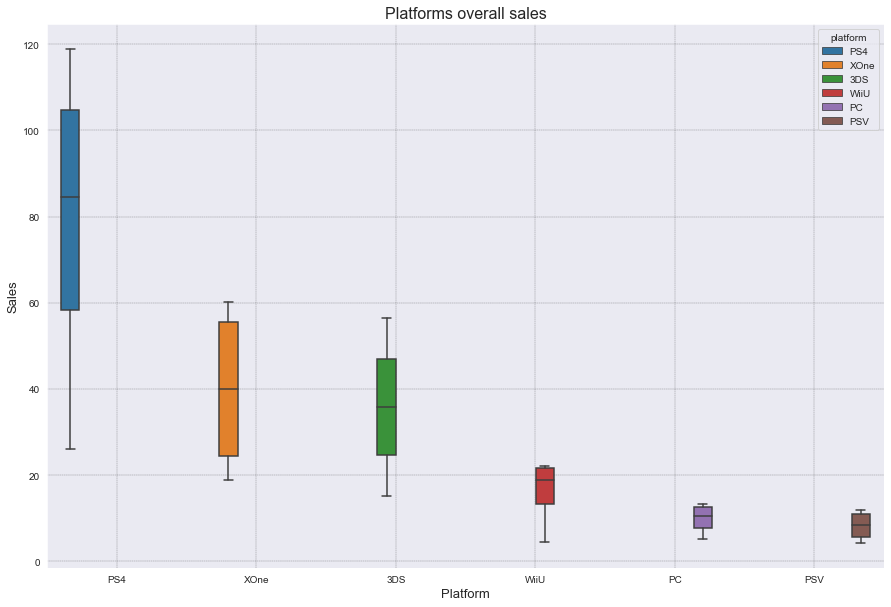

In [36]:
# фильтруем данные, оставляя только актуальные платформы

potential_list = ['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV']

potential_df = (
    potential_df[potential_df['platform']
                 .isin(potential_list)]
)

# визуализируем динамику продаж

g = (
    sns.relplot(
    data=potential_df,
    x='year_of_release', 
    col='platform', 
    col_wrap=3,
    palette='flare',
    y='total_sales',
    hue='total_sales',
    hue_norm=(40, 70),
    size='total_sales',
    sizes=(100,1200),
    height=6,
    aspect=1,
    col_order=potential_list)
    )

g.map(plt.grid, color='.7', axis='x')

(g.map(plt.axhline, y=30, color=".7", dashes=(2, 1))
 .set_axis_labels("Year", "Sales", fontsize=13)
 .set_titles("{col_name} sales", fontsize=13)
)
plt.show()


# смотрим на общий объем продаж

plt.figure(figsize=[15,10])
(
    sns.boxplot(
        data=potential_df,
        x='platform', 
        y='total_sales', 
        hue='platform')
)

plt.title('Platforms overall sales', fontsize=16)
plt.ylabel('Sales', fontsize=13)
plt.xlabel('Platform', fontsize=13)
plt.grid(color='k', linestyle='-.', linewidth = 0.2)
plt.show()



На основе графиков выше мы можем выделить `три потенциально прибыльные платформы`:

* <a href="https://en.wikipedia.org/wiki/PlayStation_4">**PS4**</a> является абсолютным лидером среди потенциально прибыльных платформ - такого уровня продаж не наблюдается больше нигде. Платформа явно находится в самом расцвете, а падение в 2016 году может быть обусловлено двумя факторами, не связанными с самой платформой: общий спад [количества выпущенных игр](#games_per_year) в последние годы, а также возможной неполностью данных ([примечанию от заказчика](#note)).

* У <a href="https://en.wikipedia.org/wiki/Xbox_One">**Xbox One**</a> динамика изменения объёма глобальных продаж очень похожа на PS4, но с меньшими масштабом. Платформа также будет актульна ещё несколько лет, а причины падения скорее всего идентичны ситуации PS4. Размах значений сопоставим с 3DS, которая вышла на два года раньше.

* <a href="https://en.wikipedia.org/wiki/Nintendo_3DS">**Nintendo 3DS**</a> имеет довольно высокий уровень продаж в 2013-ом году, но с набором популярности **XOne** и **PS4** продажи начинают падать.  Так как 3DS относится к <a href="https://en.wikipedia.org/wiki/Handheld_game_console">портативным игровым платформам</a>, она не может составлять серьёзную конкуренцию таким системам, как PS4.

Остальные платформы не показывают больших объёмов глобальных продаж или впечатляющих темпов роста

--------
Согласно выводам выше, самой потенциально прибыльной платформой является **PS4**, в тройку также входят **XOne** и **3DS**.

### Влияние оценок критиков и пользовательского рейтинга на уровень продаж

Для начали исследуем влияение оценок на продажи в рамках одной из платформ, после чего попробуем соотнести выводы с остальными. Чем больше игр - тем точнее картина исследования, потому для начала найдём платформу с самым большим количеством игр:

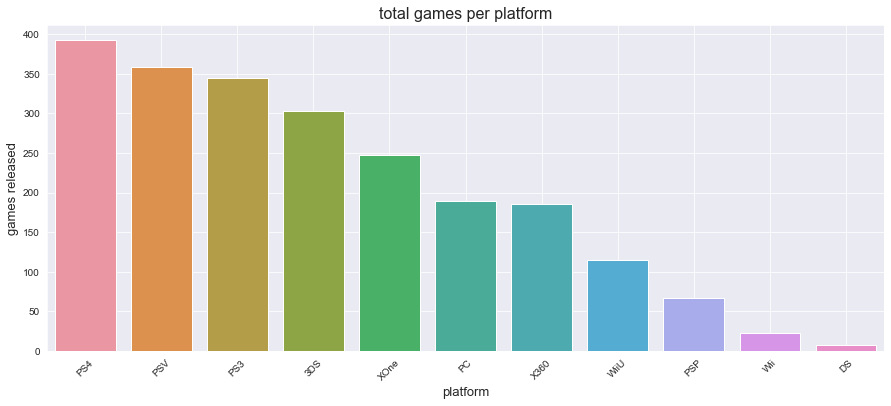

In [37]:
# визуализируем количество выпущенных игр с 2013-го по 2016-ый по игровым платформам

platform_games_released = (
    data
    .pivot_table(
        index='platform', 
        values='name', 
        aggfunc='count')
    .sort_values('name', ascending=False)
)

plt.figure(figsize=(15,6))

sns.barplot(
    x=platform_games_released.index, 
    y = platform_games_released['name']
)

plt.title('total games per platform', fontsize=16)
plt.xlabel('platform', fontsize=13)
plt.xticks(rotation=45)
plt.ylabel('games released', fontsize=13)
plt.grid()
plt.show()

На этом этапе исследования расмотрим первые 5 платформ с графика выше - все они имеют более 200 выпущенных игр, что означает больше данных для рассмотрения:

In [38]:
# создадим датафрейм с платформамами, на которых больше 200 игр
# добавим информацию о глобальных продажах, оценках пользователей и критиков
# удалим данные об играх, где нет хотя бы одной из оценок

top_list = (
    platform_games_released
    .reset_index()
    .query('name > 200')['platform']
    .to_list()
)


top_games_count_platforms = (
    
    data[data['platform']
         .isin(top_list)]
    .reset_index(drop=True)
    .pivot_table(index=['platform', 'name'], values=['total_sales', 'critic_score', 'user_score'])
    .dropna()
    .reset_index()
)

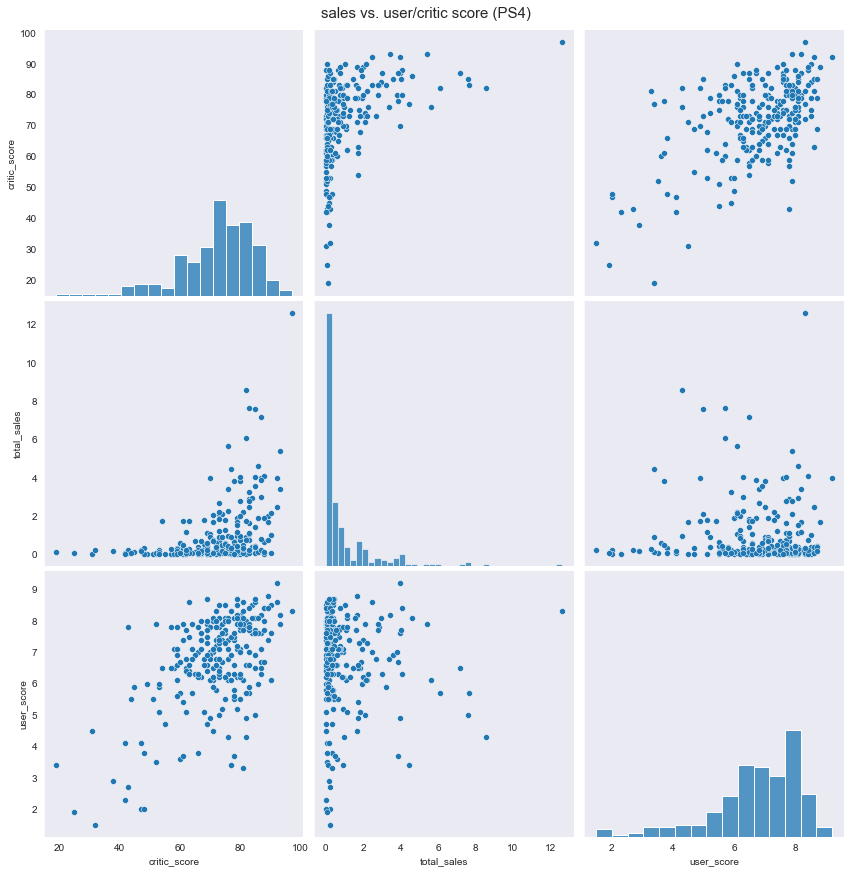

In [39]:
# больше всего игр было выпущено на Playstation 4 - изучим её первой

g = (
    sns.pairplot(
        top_games_count_platforms[top_games_count_platforms['platform'] == 'PS4'],
        height=4,
        aspect=1)
)

g.fig.suptitle("sales vs. user/critic score (PS4)", y=1.01, fontsize=15)
plt.show()

График изучает зависимость продаж от оценок, но корреляция явно невысокая - игр с рейтингом пользователей меньше `5` и оценок критиков меньше `50` намного меньше, чем всех остальных, потому и большинство продаж приходится на игры с более высоким рейтингом. Тем не менее, пики продаж приходятся на игры с оценками выше `7/70`. Намного большая корреляция наблюдается между оценками пользователей и критиков - картина влияния на уровень продаж очень схожа.

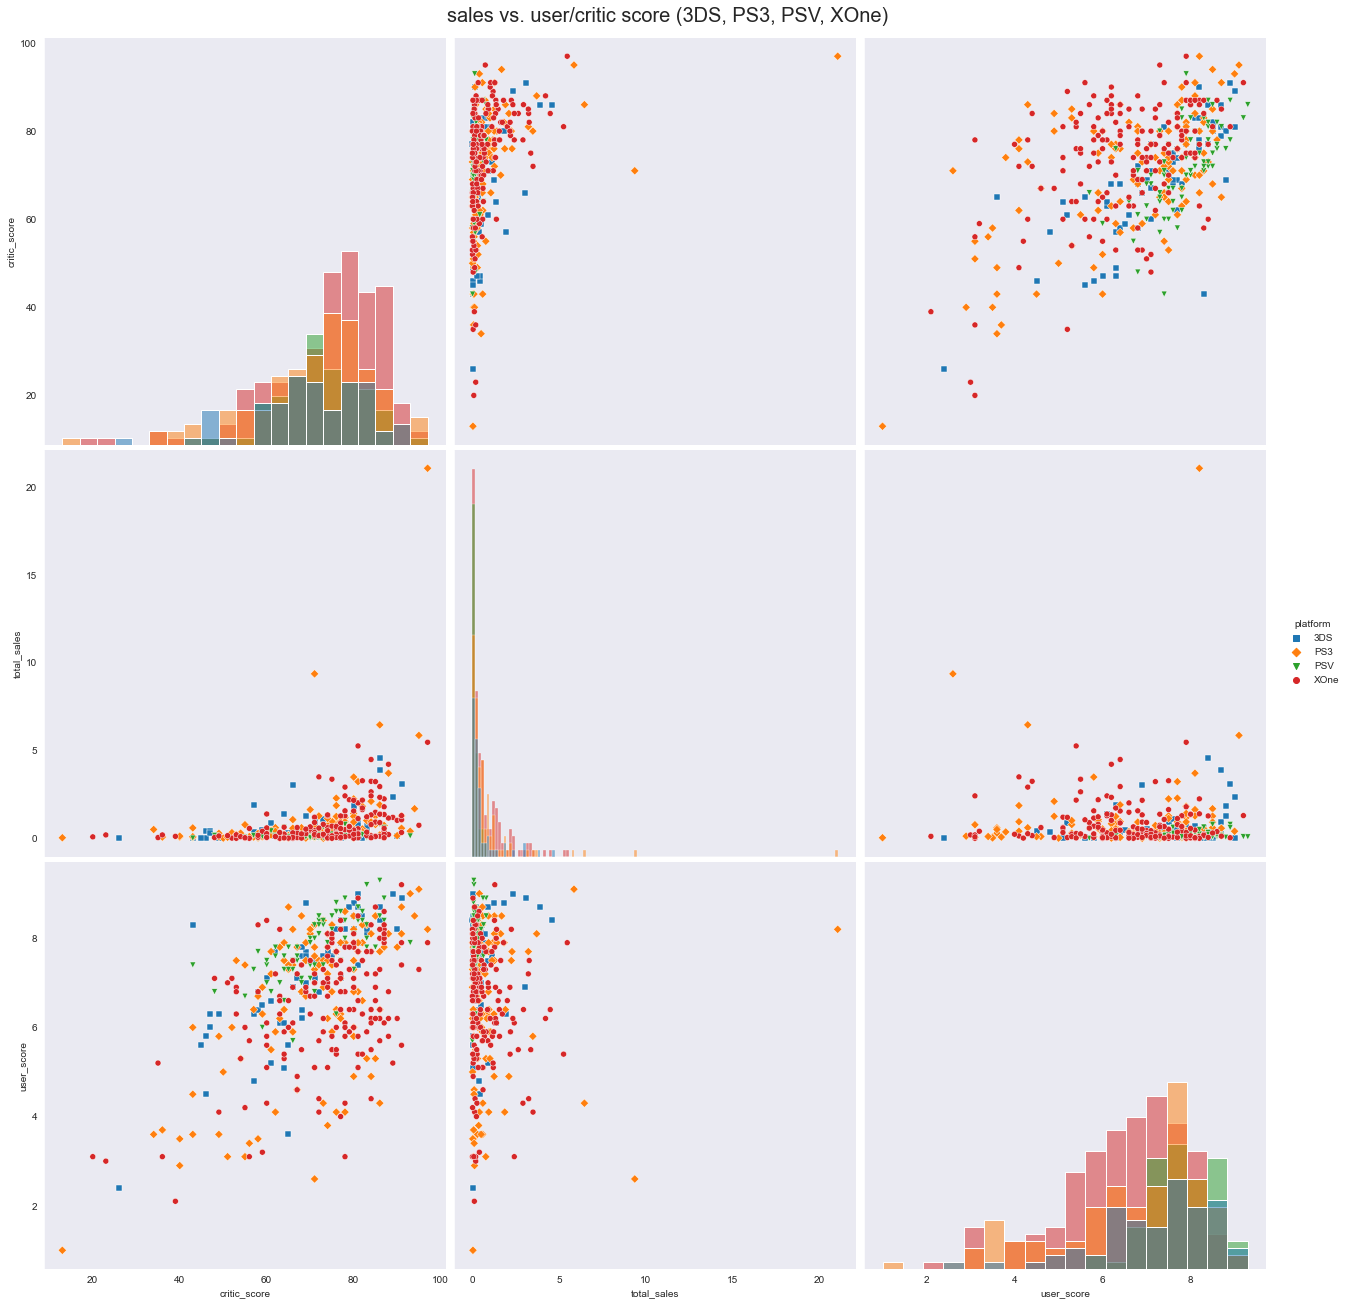

In [40]:
# посмотрим остальные четыре платформы

g = (
    sns.pairplot(
        top_games_count_platforms[top_games_count_platforms['platform'] != 'PS4'],
        height=6,
        aspect=1,
        hue='platform',
        diag_kind='hist',
        markers=['s', 'D', 'v', 'o']
    )
)

g.fig.suptitle("sales vs. user/critic score (3DS, PS3, PSV, XOne)", y=1.01, fontsize=20)
plt.show()

Ситуация идентична `PS4` - несмотря на наличие пиков продаж у игр с более низкими оценками, в целом распределение значений очень похоже. Необходима посчитать точную корреляцию значений таблицы для финальных выводов:

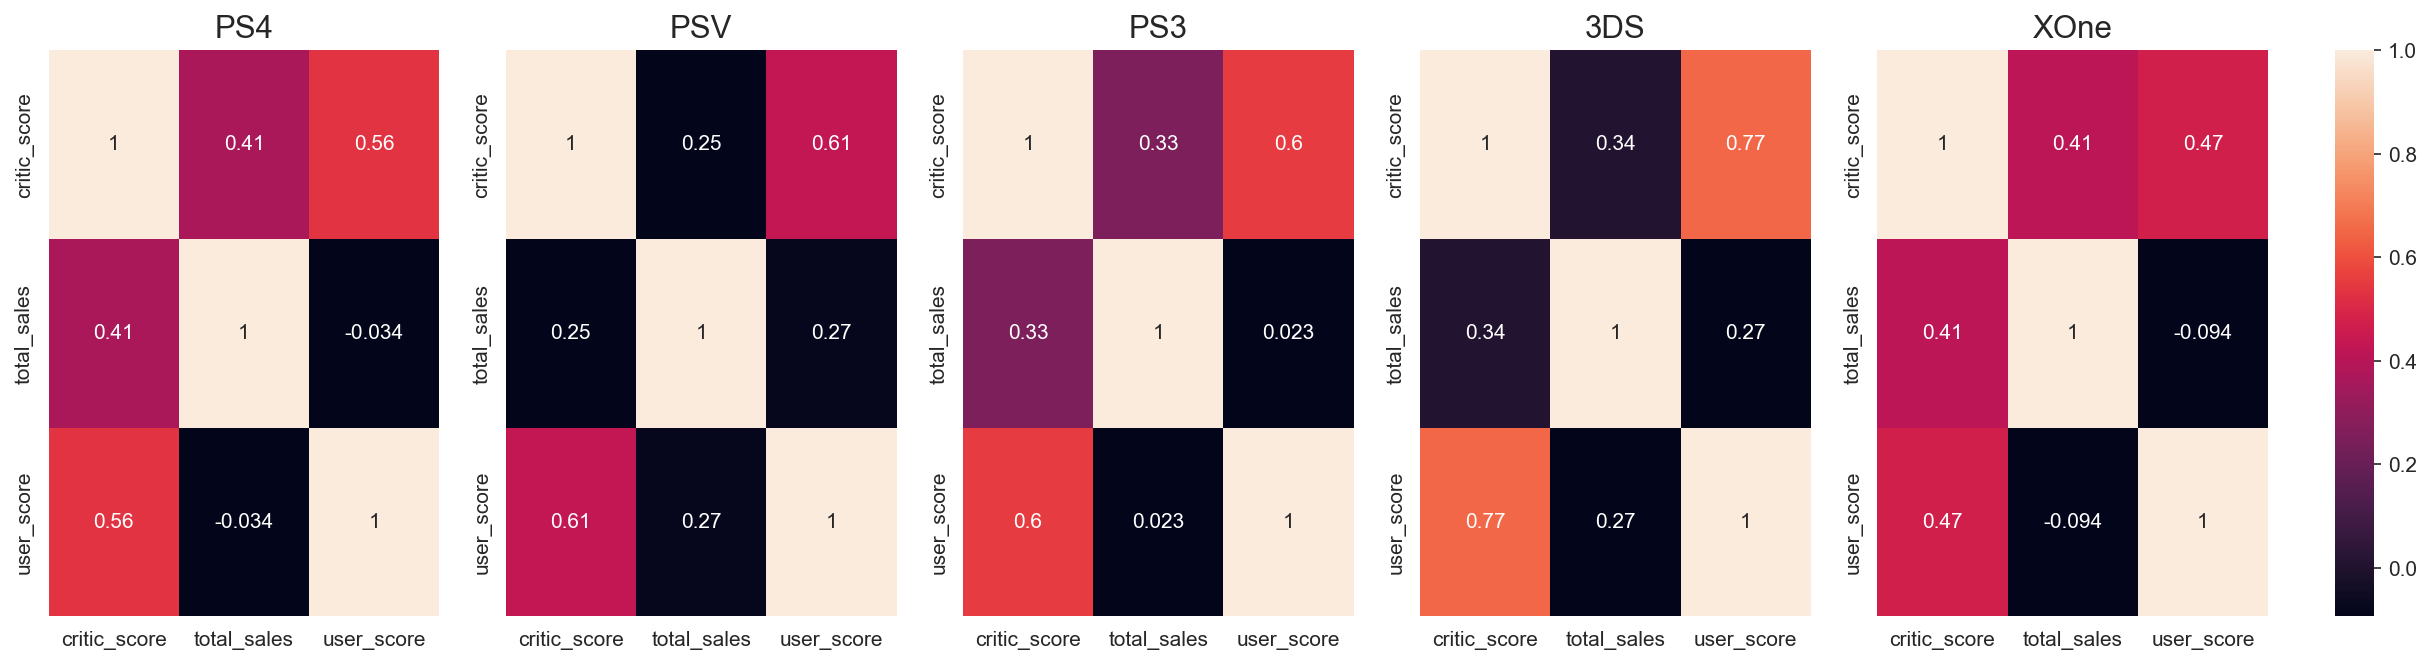

In [41]:
# визуализируем корреляцию данных на всех платформах c помощью функции

def corr_heat (platform, ax):
    
    if ax != ax5:
        g = (
            sns.heatmap(
                top_games_count_platforms[top_games_count_platforms['platform'] == platform]
                .corr(),
                annot=True,
                cbar=False,
                ax=ax)
            )
    else:
        g = (
            sns.heatmap(
                top_games_count_platforms[top_games_count_platforms['platform'] == platform]
                .corr(),
                annot=True,
                cbar_ax=axcb,
                ax=ax)
            )
        
    return g


f,(ax1, ax2, ax3, ax4, ax5, axcb) = plt.subplots(1, 6, figsize=(20,5), dpi=150,
            gridspec_kw={'width_ratios':[1, 1, 1, 1, 1, 0.1]})

ax1.get_shared_y_axes().join(ax2, ax3, ax4, ax5)

g1 = corr_heat(top_list[0], ax1).set_title(top_list[0])
g2 = corr_heat(top_list[1], ax2).set_title(top_list[1])
g3 = corr_heat(top_list[2], ax3).set_title(top_list[2])
g4 = corr_heat(top_list[3], ax4).set_title(top_list[3])
g5 = corr_heat(top_list[4], ax5).set_title(top_list[4])


plt.show()

----
- Рейтинги пользователей и оценки критиков не имеют значительного влияния на уровень продаж - несмотря на то, что самые продаваемые игры чаще всего высоко оценены, анализ данных не показывает значительной корреляции. Интересная особенность - схожие показатели платформ **PS4** и **XOne** (незначительная отрицательная корреляция продаж и рейтингов пользователей, корреляция с оценками критиков на уровне ~0.4) - поскольку эти платформы являются самыми актуальными в выборке, это даёт повод сделать предположение об изменении уровня корреляции этих показателей в зависимости от этапа жизненого цикла платформы.

<a id='genre_sales'></a>

### Оценка прибыльности игр в разрезе жанров
Теперь изучим, насколько хорошо продаются игры в зависимости от жанра:

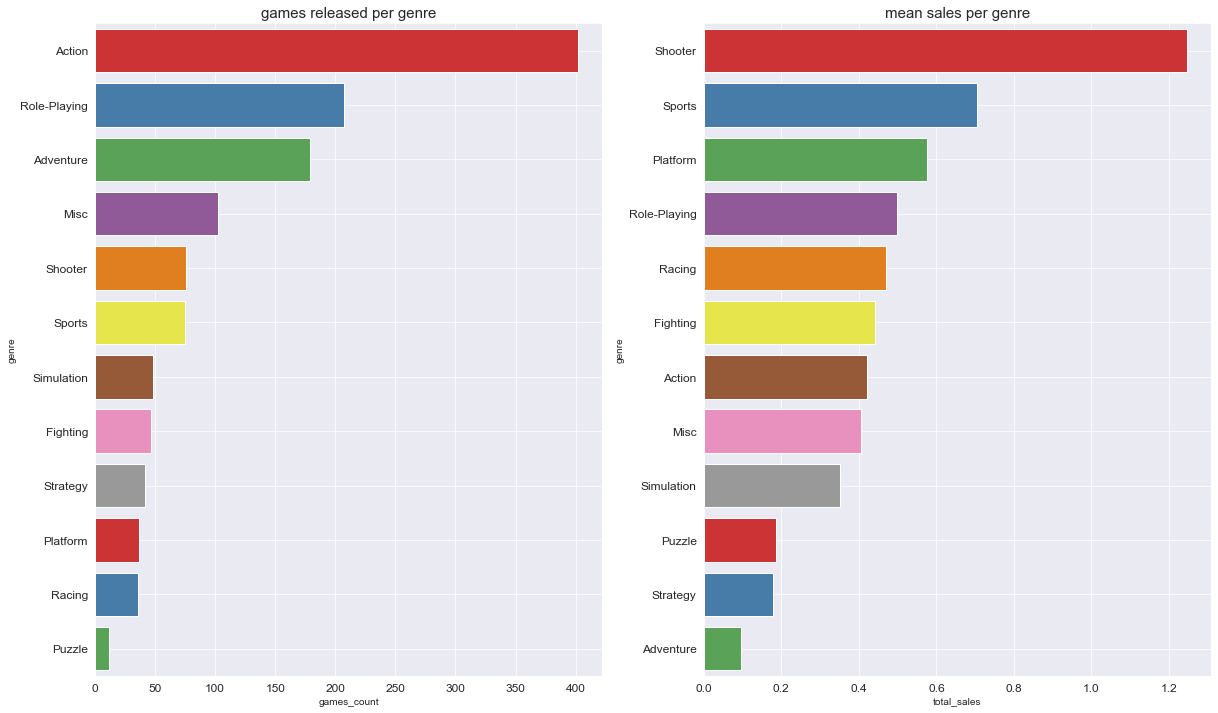

In [42]:
# сделаем топы жанров по количеству выпущенных игр и среднему объёму продаж

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,12))

genre_data = (
    data
    .pivot_table(
        index='genre', 
        values=['name', 'total_sales'], 
        aggfunc={'name':'nunique', 'total_sales':'mean'})
    .rename(columns={'name':'games_count'})
    .sort_values('total_sales', ascending=False)
    .reset_index()
)

sns.barplot(
    data=genre_data
    .sort_values('games_count', ascending=False),
    y='genre', 
    x='games_count',
    palette='Set1',
    ax=ax1
)

sns.barplot(
    data=genre_data, 
    y='genre', 
    x='total_sales',
    palette='Set1',
    ax=ax2
)

ax1.set_title('games released per genre', fontsize=15)
ax2.set_title('mean sales per genre', fontsize=15)


for ax in (ax1, ax2):
    ax.grid()   
    ax.tick_params(labelsize=12)

Топы жанров по количеству выпущенных игр и средних продаж не имеют ничего общего. Например, несмотря на то, что жанр **Action** является самым крупным по количеству выпущенных игр, по среднему объёму глобальных продаж он лишь на пятом месте, у жанра **Shooter** ситуация зеркальная. Посмотрим на показатели продаж поподробнее:

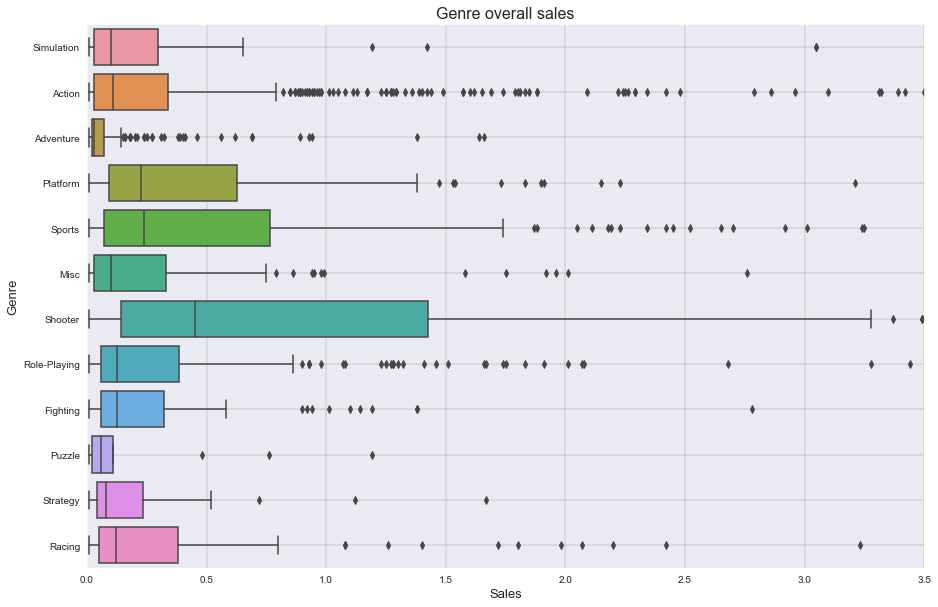

In [43]:
# посмотрим на общее количество продаж

plt.figure(figsize=[15,10])

sns.boxplot(
    data=data.sort_values('total_sales'),
    y='genre',
    x='total_sales'
)


plt.title('Genre overall sales', fontsize=16)
plt.ylabel('Genre', fontsize=13)
plt.xlabel('Sales', fontsize=13)
plt.grid(color='k', linestyle='-.', linewidth = 0.2)
plt.xlim(0, 3.5)
plt.show()

----
Этот этап исследования хорошо демонстрирует, что большое количество игр не всегда означает хорошие продажи.

* Для всех жанров характерна отрицетельная скошенность распределения и большое количество выбросов за пределами третьего квартиля. Из-за этого медианые и средние сильно отличаются (на примере **Shooter**: среднее значение (график 1) превышает медиану (график 2) более чем в два раза).


* В тройку самых прибыльных жанров входят **Shooter**, **Sports** и **Platform**. При этом по количеству выпущенных игр эти жанры не занимают лидирующие позиции, что делает такие игры потенциально самыми прибыльными и в целом характеризует как более качественный продукт.


* Совершенно обратная ситуация у жанра **Adventure** - при одном из самых высоких показателей количества выпущенных игр, его средняя глобальная выручка находится на последнем месте. Такие игры явно потеряли актульность в последние годы, потому делать серьёзные вложения в их продвижение нецелесообразно.


### Вывод

В ходе анализа была рассмотрена динамика продаж для различных платформ в четыре этапа:

**Этап 1**: Определение актуального периода времени для исследования данных, основываяь на рассмотрение динамики продаж по годам и установлении примерного жизнененого цикла платформы. 

В ходе предобработки данных удалось установить, что годы выпуска игр в датасете - с 1980-го по 2016-ый. Соответственно, для составления наиболее актуальных прогнозов, необходимо установить актуальный период для анализа. На динамике количества выпущенных игр виден стабильный рост с 1990-го года, который доистигает пика в ~1,000 изданных игр в 2008-ом, после чего начинается резкий спад. Исторически лучший период - с 2005-го по 2010-ый. Для дальнейшего исследования установим 1990-ый год как нижний порог.
При анализе динамики продаж самых успешных платформ были сделаны следующие выводы:

* Жизненый цикл игровой платформы длится около 10 лет, пик продаж приходится примерно на его середине.
* До 2005-го года на отрезках в 5 лет представлена только одна топ-платформа, после же начинается конкуренция между несколькими платформами одновременно.
* Актуальность всех расматриваемых платформ заканчивается в 2015-ом году. Поскольку данные в таблице ограниченны 2016-ым годом, современные платформы ещё не успели набрать значительную аудиторию, а потому не присутствует в топе по количеству проданных игр.

На основании этих выводов нижняя граница была установлена в 2013-ом году - к этому году уже начался значительный спад популярности платформ на графике выше, что косвенно указывает на выпуск их более новых версий или других новых платформ. Полученный период в 3 года будет показывать расцвет самых новых платформ. Для актуальных прогнозов более ранние данные не принесут пользы.

----
Таким образом, актуальным периодом для исследования является **2013-2016 годы**.

**Этап 2**: Определение потенциально прибыльных платформ по результатам анализа динамики продаж.

Был проведён анализ актуальности всех платформ на 2016-ый год, после чего было подробно рассмотрены три самых многообещающих из них:

* <a href="https://en.wikipedia.org/wiki/PlayStation_4">**PS4**</a> является абсолютным лидером среди потенциально прибыльных платформ - такого уровня продаж не наблюдается больше нигде. Платформа явно находится в самом расцвете, а падение в 2016 году может быть обусловлено двумя факторами, не связанными с самой платформой: общий спад [количества выпущенных игр](#games_per_year) в последние годы, а также возможной неполностью данных ([примечанию от заказчика](#note)).

* У <a href="https://en.wikipedia.org/wiki/Xbox_One">**Xbox One**</a> динамика изменения объёма глобальных продаж очень похожа на PS4, но с меньшими масштабом. Платформа также будет актульна ещё несколько лет, а причины падения скорее всего идентичны ситуации PS4. Размах значений сопоставим с 3DS, которая вышла на два года раньше.

* <a href="https://en.wikipedia.org/wiki/Nintendo_3DS">**Nintendo 3DS**</a> имеет довольно высокий уровень продаж в 2013-ом году, но с набором популярности **XOne** и **PS4** продажи начинают падать.  Так как 3DS относится к <a href="https://en.wikipedia.org/wiki/Handheld_game_console">портативным игровым платформам</a>, она не может составлять серьёзную конкуренцию таким системам, как PS4.

Остальные платформы не показывают больших объёмов глобальных продаж или впечатляющих темпов роста

Согласно выводам выше, самой потенциально прибыльной платформой является **PS4**, в тройку также входят **XOne** и **3DS**.

**Этап 3**: Исследование влияния оценок критиков и пользовательского рейтинга на уровень продаж с помощью расчёта корреляции.

В рамках этого этапы были рассмотрены пять самых популярных платформ (по количеству выпущенных игр): **PlayStation 4**, **PlayStation Vita**, **PlayStation 3**, **Nintendo 3DS** и **Xbox One**. Все они имеют более 200 выпущенных игр, что означает больше данных для рассмотрения и более точную картину исследования. 

Графики рассеяния продемонстрировали зависимость продаж от оценок, но корреляция явно невысокая - игр с рейтингм пользователей меньше `5` и оценок критиков меньше `50` намного меньше, чем всех остальных, потому и большинство продаж приходится на игры с более высоким рейтингом. Тем не менее, пики продаж приходятся на игры с оценками выше `7/70`. Намного большая корреляция наблюдается между оценками пользователей и критиков - картина влияния на уровень продаж очень схожа.

На основании анализа графиков и расчёта коэффициентов корреляции данных был сделан вывод, что рейтинги пользователей и оценки критиков не имеют значительного влияния на уровень продаж - несмотря на то, что самые продаваемые игры чаще всего высоко оценены, анализ данных не показывает значительной корреляции. 

Интересная особенность - схожие показатели платформ **PS4** и **XOne** (незначительная отрицательная корреляция продаж и рейтингов пользователей, корреляция с оценками критиков на уровне ~0.4) - поскольку эти платформы являются самыми актуальными в выборке, это даёт повод сделать предположение об изменении уровня корреляции этих показателей в зависимости от этапа жизненого цикла платформы.

**Этап 4**: Оценка прибыльность игр в разрезе жанров.

В рамках этого этапа были проанализированы глобальные продажи и объём количества выпущенных игр в разных жанров, а также их соотношение, на основе чего удалось сделать следующие выводы:

* Для всех жанров характерна отрицетельная скошенность распределения и большое количество выбросов за пределами третьего квартиля. Из-за этого медианые и средние сильно отличаются (на примере **Shooter**: среднее значение (график 1) превышает медиану (график 2) более чем в два раза).


* В тройку самых прибыльных жанров входят **Shooter**, **Sports** и **Platform**. При этом по количеству выпущенных игр эти жанры не занимают лидирующие позиции, что делает такие игры потенциально самыми прибыльными и в целом характеризует как более качественный продукт.


* Совершенно обратная ситуация у жанра **Adventure** - при одном из самых высоких показателей количества выпущенных игр, его средняя глобальная выручка находится на последнем месте. Такие игры явно потеряли актульность в последние годы, потому делать серьёзные вложения в их продвижение нецелесообразно.


<a id='user-port'></a>

## Портрет пользователя в зависимости от региона

Теперь пришло время посмотреть на картину в разных регионах. Эта часть исследования будет проведена в три этапа:

- Определение самых популярных платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияние рейтинга ESRB на уровень продаж.

Все эти шаги будут выполнены для трёх крупнейших регионов: Северная Америка, Европа и Япония.

### Самые популярные платформы в крупных регионах

Для всех трёх этапов данные можно сгруппировать и визуализировать схожим образом, потому для оптимизации процесса напишем несколько функций:

In [44]:
# функция для группировки данных

def region_group(index): 
    regions = (
        data
        .pivot_table(
            index=index, 
            values=['na_sales', 'eu_sales', 'jp_sales'], 
            aggfunc='sum')
    )
    return regions

# функция для отбора топ-5

def top_5 (region_sales):
    
    top_5 = (
        regions[region_sales]
        .sort_values(ascending=False)[:5]
    )
    return top_5

# визуализация работы предыдущих функций

def top_plot(region_sales, ax):

    sns.barplot(
        y=top_5(region_sales).values, 
        x= top_5(region_sales).index,
        palette='flare_r',
        ax=ax
    )

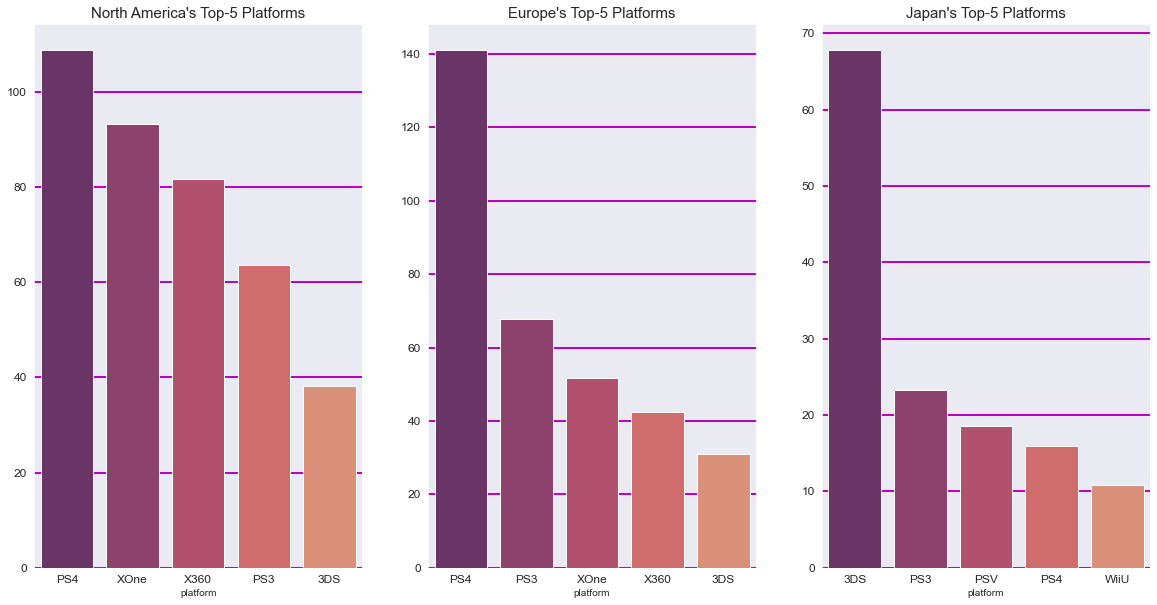

na_sales   437.71
eu_sales   392.23
jp_sales   140.78
dtype: float32

In [45]:
# опробуем функции для визуализации топ-5 платформ
# в разрезе регионов

fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

regions = region_group('platform')
top_plot('na_sales', ax1)
top_plot('eu_sales', ax2)
top_plot('jp_sales', ax3)

ax1.set_title("North America's Top-5 Platforms", fontsize=15)
ax2.set_title("Europe's Top-5 Platforms", fontsize=15)
ax3.set_title("Japan's Top-5 Platforms", fontsize=15)


for ax in (ax1, ax2, ax3):
    ax.grid(axis='y', linewidth=2, color='m')   
    ax.tick_params(labelsize=12)


plt.show()    

(
    region_group('platform')
    .sum()
    .sort_values(ascending=False)
)

Топы платформы в регионах представлены следующими консолями:
 
Японская корпорация <a href="https://en.wikipedia.org/wiki/Sony_Interactive_Entertainment">**Sony**</a>
 
 * <a href="https://en.wikipedia.org/wiki/PlayStation_3">**PlayStation 3**</a>
 * <a href="https://en.wikipedia.org/wiki/PlayStation_4">**PlayStation 4**</a>
 * <a href="https://en.wikipedia.org/wiki/PlayStation_Vita">**PlayStation Vita**</a>
 
 
Японская корпорация <a href="https://en.wikipedia.org/wiki/Nintendo">**Nintendo**</a>

 * <a href="https://en.wikipedia.org/wiki/Nintendo_3DS">**Nintendo 3DS**</a>
 * <a href="https://en.wikipedia.org/wiki/Wii_U">**Nintendo WiiU**</a>


Американская корпорация <a href="https://en.wikipedia.org/wiki/Microsoft">**Microsoft**</a>

 * <a href="https://en.wikipedia.org/wiki/Xbox_360">**Xbox 360**</a>
 * <a href="https://en.wikipedia.org/wiki/Xbox_One">**Xbox One**</a>

* На рынке **Северной Америки** первые две строчки занимают **PS4** и **XOne**, что лишний раз подтверждает их актуальность. Тем не менее следующие две консоли пренадлежат к <a href="https://en.wikipedia.org/wiki/Seventh_generation_of_video_game_consoles">"седьмому поколению домашних игровых платформ"</a>, которые вышли в 2005-2006-ых годах. Другими словами - они намного менее актуальны, чем **3DS**, занимающая последнее место в топе. По уровню общего объёма продаж игр на всех платформах регион является абсолютным лидером.


* Топ-5 рынка **Европы** имеет такой же состав платформ и практически такое же распределение между ними, за исключением смещения **PS3** с четвёртого места на второе. Это делает её популярнее более актуальной **XOne** и прямого конкурента седьмого поколения **X360**. В целом общий объём продаж сопоставим с Северной Америкой, но отдельный показатель **PS4** здесь намного выше.


* **Японский рынок** значительно отличатся от остальных - на нём с большим отрывом лидирует **3DS**, составляя почти половину всех игровых продаж в регионе. Другие актуальные консоли здесь не так популярны - **PS4** находится на четвёртом месте, **XOne** не представлена вовсе - все платформы в топе региона произведены японскими компаниями. Такое лидерство **3DS** может быть объяснено возможной ориентацией этого продукта на внутренний рынок, что объяснило бы также её отставание в других регионах.  Общий объём игровых продаж примерно в 3 раза меньше Американского.

### Самые популярные жанры в крупных регионах

Теперь посмотрим на топ-5 жанров в разных регионах:

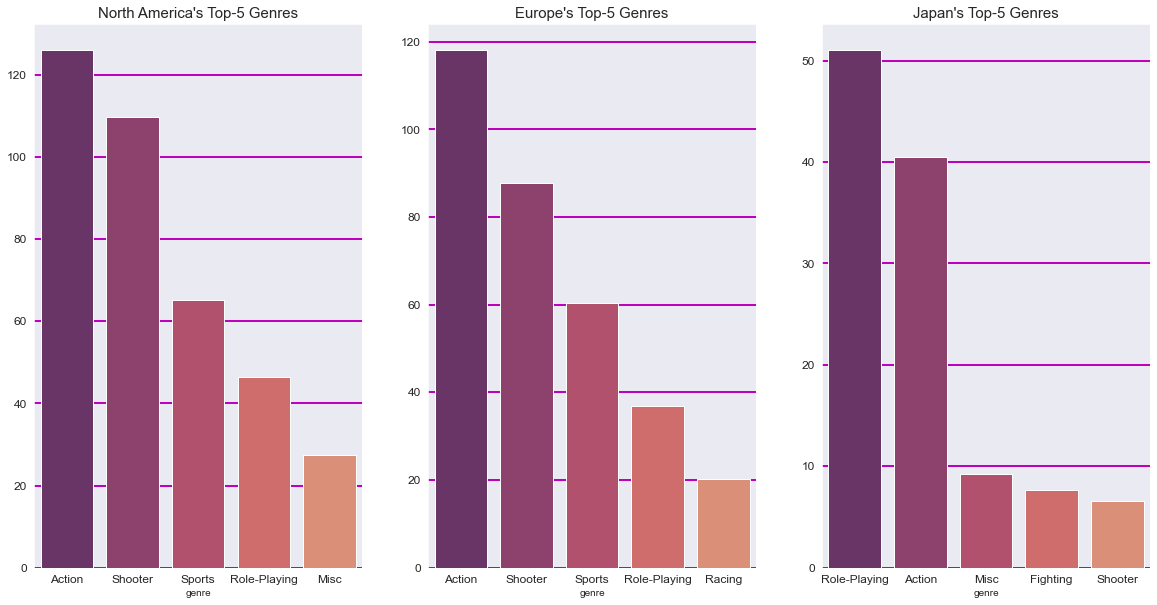

In [46]:
# используем функции из предыдущего этапа

fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

regions = region_group('genre')
top_plot('na_sales', ax1)
top_plot('eu_sales', ax2)
top_plot('jp_sales', ax3)

ax1.set_title("North America's Top-5 Genres", fontsize=15)
ax2.set_title("Europe's Top-5 Genres", fontsize=15)
ax3.set_title("Japan's Top-5 Genres", fontsize=15)


for ax in (ax1, ax2, ax3):
    ax.grid(axis='y', linewidth=2, color='m')   
    ax.tick_params(labelsize=12)

* Топ жанров **Северной Америки**  схож с [общемировым топом жанров по продажам](#genre_sales) - поскольку этот регион является крупнейшим рынком видеоигр, он явно влияет на мировые тенденции в этом направлении. Довольно много игр представлено в жанре **Misc** (*англ*. "miscellaneous", *букв*. "различное, смешанное") - это игры различных специфичных жанров, которые сложно выделить в какую-то крупную категорию (например, различные музыкальные/танцевальные игры).


* Топ жанров **Европы** идентичен Северной Америке, за исключением **Racing** на пятом месте (вместо **Misc**). Соотношение распределения жанров также очень схоже.


* Рынок **Японии** снова отличился - с большим отрывом лидируют ролевые игры (**Role-Playing**), один из самых популярных жанров в мире **Shooter** находится на последнем месте, но зато есть **Fighting** (в топах других регионов не представлен).

### Влияние рейтинга ESRB на уровень продаж

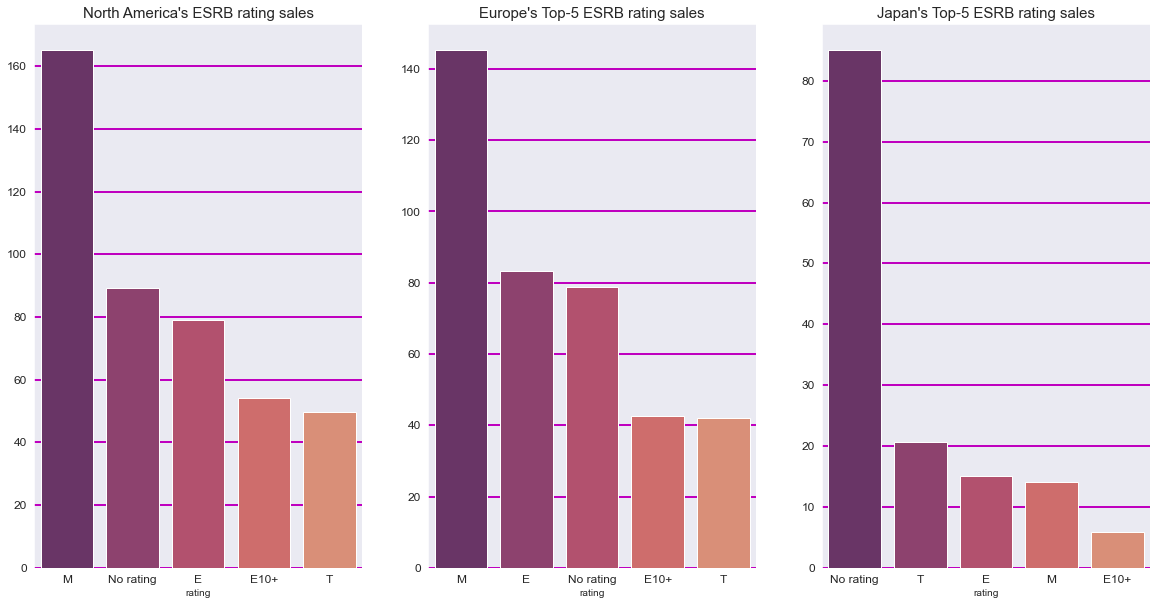

In [47]:
# здесь мы также можем использовать функции из предыдущего этапа

fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

regions = region_group('rating')
top_plot('na_sales', ax1)
top_plot('eu_sales', ax2)
top_plot('jp_sales', ax3)

ax1.set_title("North America's ESRB rating sales", fontsize=15)
ax2.set_title("Europe's Top-5 ESRB rating sales", fontsize=15)
ax3.set_title("Japan's Top-5 ESRB rating sales", fontsize=15)


for ax in (ax1, ax2, ax3):
    ax.grid(axis='y', linewidth=2, color='m')   
    ax.tick_params(labelsize=12)

Рейтинг ESRB прежде всего означает возрастной рейтинг игры, присваемой ей при выпуске в Северной Америке. В других основных регионах действуют собственные рейтинговые системы: <a href="https://en.wikipedia.org/wiki/PEGI">**PEGI**</a> в Европе и <a href="https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization">**CERO**</a> в Японии, чем скорее всего и обусловлено большое количество пропусков - либо у игр не было рейтинга **ESRB** вовсе в связи с отсутствием на американском рынке, или же сбор данных не учитывал различие между рейтингами (если сбор данных о рейтингах **ESRB** вёлся посредством парсинга веб-страниц разработчиков игр, то там мог указан только рейтинг местной организации, потому в данных образовался пропуск - таким образом можно предположить, что пропуски в Северной Америке могут состоять из игр, которые произведены компаниями из других регионов).

Таким образом делать серьёзные выводы по имеющимся данным будет сложно - <a href="https://www.kaspersky.com/blog/gaming-age-ratings/11647/  ">**бывают случаи**</a>, когда одной и той же игре в разных странах присваивается кардинально разный рейтинг.

По имеющимся данным можно сделать следующией предположения:

* Рейтинг **M** (17+) является лидером **Европы** и **Северной Америки**. В целом распределения этих регионов выглядит схоже.


* В отличии от других регионов, в **Японии** жанр **T** (13+) преобладает над остальными.

### Вывод

Этот этап исследования продемонстрировал явную необходимость учёта особенностей региональных рынков при определении потенциальной успешности игры, так как общемировые тенденции не всегда играют решающую роль в ситуации на рынке. 

**Общие выводы**

* Рынок Северной Америки является крупнейшим регионом потребителей видеоигр, общий уровень продаж обходит показатели Европы и в три раза превышает рынок Японии. За счёт объёмов продаж Америка имеет весомое влияние на общемировые тенденции. Рынок Европы, за редким исключением, показывает идентичную Америке картину.


* Рынок Японии характерен сильной идентичностью по сравнению с остальными - тенденции на всех этапах исследования разительно отличались от общемировых.

* В топах жанров всех регионов большой популярностью пользуются игры в жанре **Misc** (*англ*. "miscellaneous", *букв*. "различное, смешанное") - это игры различных специфичных жанров, которые сложно выделить в какую-то крупную категорию (например, различные музыкальные/танцевальные игры).

**Топ-5 платформ**

* На рынке **Северной Америки** первые две строчки занимают **PS4** и **XOne**, что лишний раз подтверждает их актуальность. Тем не менее следующие две консоли пренадлежат к <a href="https://en.wikipedia.org/wiki/Seventh_generation_of_video_game_consoles">"седьмому поколению домашних игровых платформ"</a>, которые вышли в 2005-2006-ых годах. Другими словами - они намного менее актуальны, чем **3DS**, занимающая последнее место в топе. По уровню общего объёма продаж игр на всех платформах регион является абсолютным лидером.


* Топ-5 рынка **Европы** имеет такой же состав платформ и практически такое же распределение между ними, за исключением смещения **PS3** с четвёртого места на второе. Это делает её популярнее более актуальной **XOne** и прямого конкурента седьмого поколения **X360**. В целом общий объём продаж сопоставим с Северной Америкой, но отдельный показатель **PS4** здесь намного выше.


* **Японский рынок** значительно отличатся от остальных - на нём с большим отрывом лидирует **3DS**, составляя почти половину всех игровых продаж в регионе. Другие актуальные консоли здесь не так популярны - **PS4** находится на четвёртом месте, **XOne** не представлена вовсе - все платформы в топе региона произведены японскими компаниями. Такое лидерство **3DS** может быть объяснено возможной ориентацией этого продукта на внутренний рынок, что объяснило бы также её отставание в других регионах.  Общий объём игровых продаж примерно в 3 раза меньше Американского.

**Топ-5 жанров**

* Топ жанров **Северной Америки**  схож с [общемировым топом жанров по продажам](#genre_sales) - поскольку этот регион является крупнейшим рынком видеоигр, он явно влияет на мировые тенденции в этом направлении. Довольно много игр представлено в жанре **Misc** (*англ*. "miscellaneous", *букв*. "различное, смешанное") - это игры различных специфичных жанров, которые сложно выделить в какую-то крупную категорию (например, различные музыкальные/танцевальные игры).


* Топ жанров **Европы** идентичен Северной Америке, за исключением **Racing** на пятом месте (вместо **Misc**). Соотношение распределения жанров также очень схоже.


* Рынок **Японии** снова отличился - с большим отрывом лидируют ролевые игры (**Role-Playing**), один из самых популярных жанров в мире **Shooter** находится на последнем месте, но зато есть **Fighting** (в топах других регионов не представлен).

**Рейтинги ESRB**

* Рейтинг ESRB прежде всего означает возрастной рейтинг игры, присваемой ей при выпуске в Северной Америке. В других основных регионах действуют собственные рейтинговые системы: <a href="https://en.wikipedia.org/wiki/PEGI">**PEGI**</a> в Европе и <a href="https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization">**CERO**</a> в Японии, чем скорее всего и обусловлено большое количество пропусков - либо у игр не было рейтинга **ESRB** вовсе в связи с отсутствием на американском рынке, или же сбор данных не учитывал различие между рейтингами (если сбор данных о рейтингах **ESRB** вёлся посредством парсинга веб-страниц разработчиков игр, то там мог указан только рейтинг местной организации, потому в данных образовался пропуск - таким образом можно предположить, что пропуски в Северной Америке могут состоять из игр, которые произведены компаниями из других регионов).

Таким образом делать серьёзные выводы по имеющимся данным будет сложно - <a href="https://www.kaspersky.com/blog/gaming-age-ratings/11647/  ">**бывают случаи**</a>, когда одной и той же игре в разных странах присваивается кардинально разный рейтинг.

По имеющимся данным можно сделать следующией предположения:

* Рейтинг **M** (17+) является лидером **Европы** и **Северной Америки**. В целом распределения этих регионов выглядит схоже.


* В отличии от других регионов, в **Японии** жанр **T** (13+) преобладает над остальными.

<a id='hypothesis'></a>

## Проверка гипотез

Последним этапом исследование является проверка двух сформированных заказчиком гипотез:

* Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые.
* Средние пользовательские рейтинги жанров **Action** и **Sports** разные.

### Сравнение пользовательских рейтингов игр на платформах Xbox One и PC

Перед проверкой гипотезы посмотрим на распределение пользовательских рейтингов в разрезе платформ:

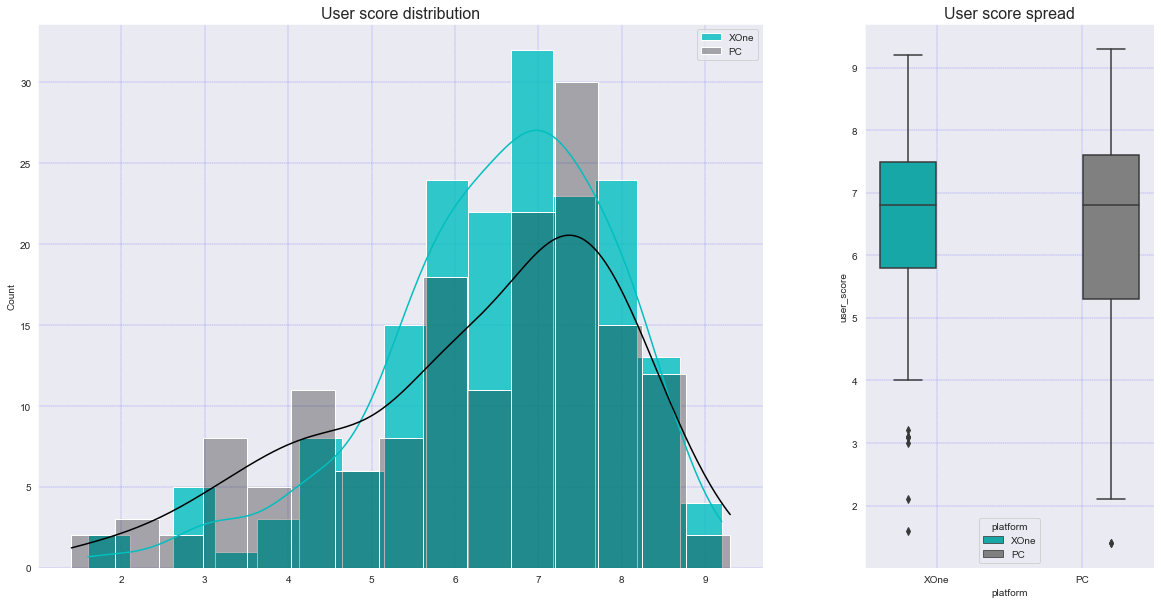

,mean,std,var
platform,,,
PC,6.27,1.74,3.04
XOne,6.52,1.38,1.91


In [48]:
#  визуализируем распределение значений
# сначала группируем данные

xbox = (
    data[data['platform'] == 'XOne']['user_score']
    .dropna()
    .values
)

pc = (
    data[data['platform'] == 'PC']['user_score']
    .dropna()
    .values
)


f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), 
                            gridspec_kw={'width_ratios':[1, 0.4]})
# строим гистограмму
    
sns.histplot(xbox, alpha=0.8, label='XOne', 
             bins=15, color='c', kde=True, ax=ax1)

sns.histplot(pc, alpha=0.3, label='PC', 
             bins=15, color='k', kde=True, ax=ax1)


#строим диаграмму размаха

sns.boxplot(
    data=(
        data[data['platform']
            .isin(['XOne', 'PC'])]),
    x='platform', 
    y='user_score', 
    hue='platform',
    palette=['c', 'grey'],
    orient='v',
    ax=ax2
)

# выводим результат

ax1.set_title('User score distribution', fontsize=16)
ax1.legend()
ax2.set_title('User score spread', fontsize=16)

for ax in (ax1, ax2):
    ax.grid(color='b', 
            linestyle='-.', 
            linewidth = 0.2)
plt.show()

# посчитаем статистические параметры

(
    data[data['platform']
         .isin(['XOne', 'PC'])]
    .pivot_table(
        index=['platform'],
        values=['user_score'],
        aggfunc=['mean', 'std', 'var'])
    .droplevel(1, axis=1)
)

* Графики обоих платформ показывают нормальное распределение с отрицательной ассиметрей - скорее всего это обусловленно выбросами за пределами первых квартилей, которые можно увидеть на диаграмме размаха. 

* Несмотря на небольшую разницу в абсолютных средних значениях, высшая точка распределения **PC** показывает большее значение, чем **XOne**. 

* Медиана **PC** также выше, но при этом размах нормальных значений намного шире - оценки ниже **4** находятся в пределах нормы, в отличии от **XOne**. 

* Уровень стандартного отклонения на обоих графиках говорит о низком разбросе данных. 

Проверим гипотезу о том, что средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые. Так как средние значения выборки находятся на примерно одном уровне, такой исход вполне возможем. Хоть среднее у **PC** немногим больше, проверим гипотезу в обе стороны. Таким образом:

**Нулевая гипотеза:** 
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 
**Альтернативная гипотеза**
 * Средние пользовательские рейтинги платформ Xbox One и PC различаются.
 
Используем инструмент *Python* для проверки гипотез о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам (t-тест):

In [49]:
alpha = .05 # установим стандартный уровень статистической значимости

results = st.ttest_ind(xbox, pc, equal_var=False) # у выборок разная дисперсия, уточняем

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 0.14759702913383088
Не получилось отвергнуть нулевую гипотезу


* Анализ имеющихся данных о рейтингах пользователей показал статистически значимую вероятность равенства средних значений генеральной совокупности платформ **XOne** и **PC** (*p-value* ~ 0.15%).

### Сравнение пользовательских рейтингов игр жанров Action и Sports

Перед проверкой гипотезы посмотрим на распределение пользовательских рейтингов в разрезе жанров:

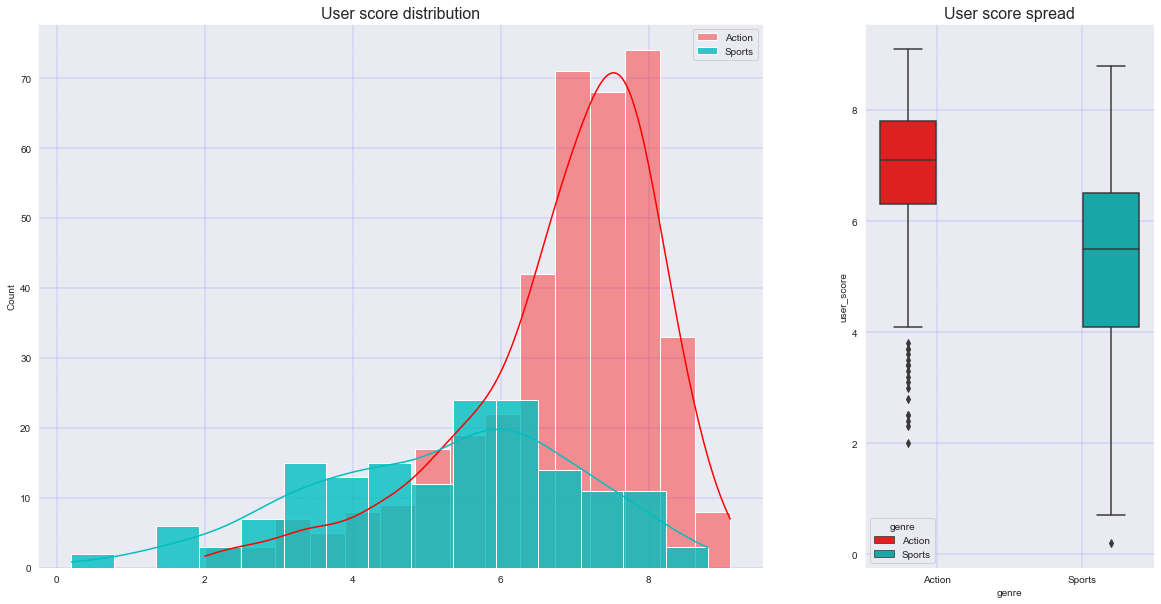

,mean,std,var
genre,,,
Action,6.84,1.33,1.77
Sports,5.24,1.78,3.18


In [50]:
# повторим код из предыдущего этапа, но уже в разрезе жанров
# сначала группируем данные

action = (
    data[data['genre'] == 'Action']['user_score']
    .dropna()
    .values
)

sports = (
    data[data['genre'] == 'Sports']['user_score']
    .dropna()
    .values
)


f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), 
                            gridspec_kw={'width_ratios':[1, 0.4]})
# строим гистограмму
    
sns.histplot(action, alpha=0.4, label='Action', 
             bins=15, color='r', kde=True, ax=ax1)

sns.histplot(sports, alpha=0.8, label='Sports', 
             bins=15, color='c', kde=True, ax=ax1)


#строим диаграмму размаха

sns.boxplot(
    data=(
        data[data['genre']
            .isin(['Action', 'Sports'])]),
    x='genre', 
    y='user_score', 
    hue='genre',
    palette=['red', 'c'],
    orient='v',
    ax=ax2
)

# выводим результат

ax1.set_title('User score distribution', fontsize=16)
ax1.legend()
ax2.set_title('User score spread', fontsize=16)

for ax in (ax1, ax2):
    ax.grid(color='b', 
            linestyle='-.', 
            linewidth = 0.2)
    
plt.show()

# посчитаем статистические параметры

(
    data[data['genre']
         .isin(['Action', 'Sports'])]
    .pivot_table(
        index=['genre'],
        values=['user_score'],
        aggfunc=['mean', 'std', 'var'])
    .droplevel(1, axis=1)
)

* Ситуцая очень похожа на картину сравнения распределения пользовательского рейтинга между платформами - графики также показывают нормальное распределение с отрицательной ассиметрей, имеются выбросы за пределами первых квартилей. 


* Среднее значение и медиана **Action** выше жанра **Sports**. 


* Размах нормальных значений значительно шире у жанра **Sports** - низкие оценки вплоть до **1** не выходят за рамки нормы, тогда как оценки ниже **4** у жанра **Action** можно считать аномалией. 


* Дисперсия **Sports** почти в два раза выше, что подтверждает большой расброс данных.

Проверим гипотезу о том, что средние пользовательские рейтинги жанров **Action** и **Sports** разные. Вероятность такого исхода подтверждается разной картиной жанров на основе выборки. Таким образом:

**Нулевая гипотеза:** 
 * Средние пользовательские рейтинги жанров **Action** и **Sports** одинаковые.
 
**Альтернативная гипотеза**
 * Средние пользовательские рейтинги жанров **Action** и **Sports** различаются.
 
Снова используем *t-тест*:

In [51]:
# в виду большого количества данных в разрезе жанров
# попробуем использовать меньший уровень статистической значимости
# для точности результатов

alpha = .01 

results = st.ttest_ind(action, sports, equal_var=False) # у выборок разная дисперсия, уточняем

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.445999656754529e-20
Отвергаем нулевую гипотезу


* Результаты проверки гипотезы показали крайне низкую вероятность равенства средних значений общей совокупности рейтингов пользоваталей жанров **Action** и **Sport** (*p-value* < 0.1%).

### Вывод

На последнем этапе исследования были рассмотрены распределения значений пользовательского рейтинга игр в разрезе двух платформ (**XOne**, **PC**) и двух жанров (**Action**, **Sport**), а также проверены гипотезы о равенстве средних значений их генеральных совокупностей.

----
При анализе данных платформ были сделаны следующие выводы:

* Графики обоих платформ показывают нормальное распределение с отрицательной ассиметрей - скорее всего это обусловленно выбросами за пределами первых квартилей, которые можно увидеть на диаграмме размаха. 


* Несмотря на небольшую разницу в абсолютных средних значениях, высшая точка распределения **PC** показывает большее значение, чем **XOne**. 


* Медиана **PC** также выше, но при этом размах нормальных значений намного шире - оценки ниже **4** находятся в пределах нормы, в отличии от **XOne**. 


* Уровень стандартного отклонения на обоих графиках говорит о низком разбросе данных. 

В результате проверки гипотезы о том, что средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые, нулевая гипотеза была отвергнута. Анализ имеющихся данных о рейтингах пользователей показал статистически значимую вероятность равенства средних значений генеральной совокупности платформ **XOne** и **PC** (*p-value* ~ 0.15%). Другими словами - `на основе результатов анализа данныз текущей выборки не удалось отвергнуть гипотезу заказчика`.

-----
В ходе анализа данных в разрезе жанров сделаны следующие выводы:

* Ситуцая очень похожа на картину сравнения распределения пользовательского рейтинга между платформами - графики также показывают нормальное распределение с отрицательной ассиметрей, имеются выбросы за пределами первых квартилей. 


* Среднее значение и медиана **Action** выше жанра **Sports**. 


* Размах нормальных значений значительно шире у жанра **Sports** - низкие оценки вплоть до **1** не выходят за рамки нормы, тогда как оценки ниже **4** у жанра **Action** можно считать аномалией. 


* Дисперсия **Sports** почти в два раза выше, что подтверждает большой расброс данных.

Проверка гипотезы о том, что средние пользовательские рейтинги жанров **Action** и **Sports** разные, также позволила отвергнуть нулевую гипотезу. Результаты проверки показали крайне низкую вероятность равенства средних значений общей совокупности рейтингов пользоваталей (*p-value* < 0.1%), что в свою очередь `позволяет принять гипотезу заказчика в качестве альтернативной`.

<a id='conclusion'></a>

## Общий вывод

----
**Рекомендации**

- В тройку самых прибыльных жанров входят **Shooter**, **Sports** и **Platform**. При этом по количеству выпущенных игр эти жанры не занимают лидирующие позиции, что делает такие игры потенциально самыми прибыльными и в целом характеризует как более качественный продукт. При определении успешности жанра по уровню продаж медианое значение является более показательным, чем среднее.


- Самой большой потенциал из актуальных платформ у **PS4**. Помимо самого высокого уровня средних общемировых продаж игр, она единственная из актуальных платформ входит в топ-5 самых популярных в каждом регионе. На рынке Японии стоит также сделать упор на игры для портативных консолей (самая актуальная сейчас - **Nintendo 3DS**).


- При сборе информации о возрастных рейтингах игр в будущем нужно также учитывать другие организации, так как во всех основных регионах действуют собственные системы присвоения возрастного рейтинга: **ESRB** в Северной Америке, **PEGI** в Европе и **CERO** в Японии. Одних лишь данных по рейтингам **ESRB** недостаточно для полного анализа, но уже сейчас можно сделать вывод, что жанр **M** (17+) является самым успешным на рынках Европы и Северной Америки. Из игр с установленым рейтингом **ESRB** в Японии больше преобладает жанр **T** (13+).


- Рейтинги пользователей и оценки критиков не имеют значительного влияния на уровни продаж, потому не стоит их серьёзно учитывать при оценке потенциальной успешности продукта. 

----

Целью исследования являлся анализ исторических данных об играх из открытых источников, с целью выявления определяющие успешность игры закономерности. 

Данные от заказчика были получены в виде таблицы `games.csv`, которая содержала информацию о продажах игр, оценках пользователей и экспертов, жанров и игровых платформ выпуска, все данные датированы 2016-ым годом и ранее. Была совершена предобработка данных с целью исправления ошибок и обработки пропущенных значений, а также изменения типов данных и расчёта дополнительных параметры. Затем на основе обработанных данных был проведён исследовательский анализ данных, на основе которого был составлен портрет пользователя из основных регионов. После была совершена проверка сформированных заказчиком гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports отличаются. 

По результатам сформирован общий вывод.

Таким образом, исследование прошло в шесть этапов:

1. [**Обзор данных**](#overview)
2. [**Предобработка данных**](#pre-proc)
3. [**Исследовательский анализ данных**](#analysis)
4. [**Портрет пользователя в зависимости от региона**](#user-port)
5. [**Проверка гипотез**](#hypothesis)
6. [**Общий вывод**](#conclusion)

----
Что было отмечено в ходе `предобработки данных`:

* Данные содержат информацию об играх, выпущенных с 1980 по 2016 годы.

* Для мультиплатформеных игр отдельно считаются продажи, пользовательский рейтинг и оценки критиков (а иногда даже рейтинг ESRB) для каждой платформы, что делает объединение информации об играх нецелесообразным. К тому же на разных платформах одна и та же игра могла выходить в разные годы.

* Количество игр на каждой платформы явно растёт с не только с её популярностью, но и её актуальностью - например, платформа <a href="https://en.wikipedia.org/wiki/PC-FX">PCFX</a>  была выпущена в 1994-ом году и представляют только одну игру в таблице, а <a href="https://en.wikipedia.org/wiki/Nintendo_DS">Nintendo DS</a> была выпущена в 2004-ом и представляет уже 2,151 игру. 

* Нулевые значения в данных о продажах в разрезе регионов могут означать, что игра не выпускалась на рынок конкретного региона, или же просто плохо продавалась.

* Северная Америка, Европа и Япония являются крупнейшими рынками сбыта видеоигр, весь остальной мир объединен в одну отдельную категорию.

* Отсутствие оценок критиков и пользовательских рейтингов оправдано тем, что игры могли оцениваться только для конкретных платформ, или же не оцениваться вовсе в связи маленьким тиражом или выпуском только на локальном рынке. Коэффициент корреляции между имеющимися значениями этих столюцов составляет `0.6`, что соответствует среднему уровню взаимосвязи данных.

* Отсутствие рейтинга ESRB для некоторых игр оправдано тем, что официально организация ESRB признана и полноценно функционирует только на территории Северной Америки. Соответственно у игр, выпущенных эксклюзивно для рынков других регионов, рейтинг может отсутствовать. Также в таблице встречаются игры с устаревшими рейтингами (**EC** и **K-A**),  что вероятнее всего обусловлено их годом выпуска, а также неактульные для конкретных игр (**AO** и **RP**). В рамках проекта эти рейтинги были заменены на актуальные для более точной картины исследования.


----
Основным объектом `исследовательского анализа` стала динамика глобальных продаж игр в разрезе игровых платформ, сам анализ был проведён в четыре этапа:


**Этап 1**: Определение актуального периода времени для исследования данных, основываяь на рассмотрение динамики продаж по годам и установлении примерного жизнененого цикла платформы. 

В ходе предобработки данных удалось установить, что годы выпуска игр в датасете - с 1980-го по 2016-ый. Соответственно, для составления наиболее актуальных прогнозов, необходимо установить актуальный период для анализа. На динамике количества выпущенных игр виден стабильный рост с 1990-го года, который доистигает пика в ~1,000 изданных игр в 2008-ом, после чего начинается резкий спад. Исторически лучший период - с 2005-го по 2010-ый. Для дальнейшего исследования установим 1990-ый год как нижний порог.
При анализе динамики продаж самых успешных платформ были сделаны следующие выводы:

* Жизненый цикл игровой платформы длится около 10 лет, пик продаж приходится примерно на его середине.
* До 2005-го года на отрезках в 5 лет представлена только одна топ-платформа, после же начинается конкуренция между несколькими платформами одновременно.
* Актуальность всех расматриваемых платформ заканчивается в 2015-ом году. Поскольку данные в таблице ограниченны 2016-ым годом, современные платформы ещё не успели набрать значительную аудиторию, а потому не присутствует в топе по количеству проданных игр.

На основании этих выводов нижняя граница была установлена в 2013-ом году - к этому году уже начался значительный спад популярности платформ на графике выше, что косвенно указывает на выпуск их более новых версий или других новых платформ. Полученный период в 3 года будет показывать расцвет самых новых платформ. Для актуальных прогнозов более ранние данные не принесут пользы.

----
Таким образом, актуальным периодом для исследования является **2013-2016 годы**.

**Этап 2**: Определение потенциально прибыльных платформ по результатам анализа динамики продаж.

Был проведён анализ актуальности всех платформ на 2016-ый год, после чего было подробно рассмотрены три самых многообещающих из них:

* <a href="https://en.wikipedia.org/wiki/PlayStation_4">**PS4**</a> является абсолютным лидером среди потенциально прибыльных платформ - такого уровня продаж не наблюдается больше нигде. Платформа явно находится в самом расцвете, а падение в 2016 году может быть обусловлено двумя факторами, не связанными с самой платформой: общий спад [количества выпущенных игр](#games_per_year) в последние годы, а также возможной неполностью данных ([примечанию от заказчика](#note)).

* У <a href="https://en.wikipedia.org/wiki/Xbox_One">**Xbox One**</a> динамика изменения объёма глобальных продаж очень похожа на PS4, но с меньшими масштабом. Платформа также будет актульна ещё несколько лет, а причины падения скорее всего идентичны ситуации PS4. Размах значений сопоставим с 3DS, которая вышла на два года раньше.

* <a href="https://en.wikipedia.org/wiki/Nintendo_3DS">**Nintendo 3DS**</a> имеет довольно высокий уровень продаж в 2013-ом году, но с набором популярности **XOne** и **PS4** продажи начинают падать.  Так как 3DS относится к <a href="https://en.wikipedia.org/wiki/Handheld_game_console">портативным игровым платформам</a>, она не может составлять серьёзную конкуренцию таким системам, как PS4.

Остальные платформы не показывают больших объёмов глобальных продаж или впечатляющих темпов роста

Согласно выводам выше, самой потенциально прибыльной платформой является **PS4**, в тройку также входят **XOne** и **3DS**.

**Этап 3**: Исследование влияния оценок критиков и пользовательского рейтинга на уровень продаж с помощью расчёта корреляции.

В рамках этого этапы были рассмотрены пять самых популярных платформ (по количеству выпущенных игр): **PlayStation 4**, **PlayStation Vita**, **PlayStation 3**, **Nintendo 3DS** и **Xbox One**. Все они имеют более 200 выпущенных игр, что означает больше данных для рассмотрения и более точную картину исследования. 

Графики рассеяния продемонстрировали зависимость продаж от оценок, но корреляция явно невысокая - игр с рейтингм пользователей меньше `5` и оценок критиков меньше `50` намного меньше, чем всех остальных, потому и большинство продаж приходится на игры с более высоким рейтингом. Тем не менее, пики продаж приходятся на игры с оценками выше `7/70`. Намного большая корреляция наблюдается между оценками пользователей и критиков - картина влияния на уровень продаж очень схожа.

На основании анализа графиков и расчёта коэффициентов корреляции данных был сделан вывод, что рейтинги пользователей и оценки критиков не имеют значительного влияния на уровень продаж - несмотря на то, что самые продаваемые игры чаще всего высоко оценены, анализ данных не показывает значительной корреляции. 

Интересная особенность - схожие показатели платформ **PS4** и **XOne** (незначительная отрицательная корреляция продаж и рейтингов пользователей, корреляция с оценками критиков на уровне ~0.4) - поскольку эти платформы являются самыми актуальными в выборке, это даёт повод сделать предположение об изменении уровня корреляции этих показателей в зависимости от этапа жизненого цикла платформы.

**Этап 4**: Оценка прибыльность игр в разрезе жанров.

В рамках этого этапа были проанализированы глобальные продажи и объём количества выпущенных игр в разных жанров, а также их соотношение, на основе чего удалось сделать следующие выводы:

* Для всех жанров характерна отрицетельная скошенность распределения и большое количество выбросов за пределами третьего квартиля. Из-за этого медианые и средние сильно отличаются (на примере **Shooter**: среднее значение (график 1) превышает медиану (график 2) более чем в два раза).


* В тройку самых прибыльных жанров входят **Shooter**, **Sports** и **Platform**. При этом по количеству выпущенных игр эти жанры не занимают лидирующие позиции, что делает такие игры потенциально самыми прибыльными и в целом характеризует как более качественный продукт.


* Совершенно обратная ситуация у жанра **Adventure** - при одном из самых высоких показателей количества выпущенных игр, его средняя глобальная выручка находится на последнем месте. Такие игры явно потеряли актульность в последние годы, потому делать серьёзные вложения в их продвижение нецелесообразно.

----
Этап составления `портрета пользователя в основных регионах` продемонстрировал явную необходимость учёта особенностей региональных рынков при определении потенциальной успешности игры, так как общемировые тенденции не всегда играют решающую роль в ситуации на рынке. 

**Общие выводы**

* Рынок Северной Америки является крупнейшим регионом потребителей видеоигр, общий уровень продаж обходит показатели Европы и в три раза превышает рынок Японии. За счёт объёмов продаж Америка имеет весомое влияние на общемировые тенденции. Рынок Европы, за редким исключением, показывает идентичную Америке картину.


* Рынок Японии характерен сильной идентичностью по сравнению с остальными - тенденции на всех этапах исследования разительно отличались от общемировых.

* В топах жанров всех регионов большой популярностью пользуются игры в жанре **Misc** (*англ*. "miscellaneous", *букв*. "различное, смешанное") - это игры различных специфичных жанров, которые сложно выделить в какую-то крупную категорию (например, различные музыкальные/танцевальные игры).

**Топ-5 платформ**

* На рынке **Северной Америки** первые две строчки занимают **PS4** и **XOne**, что лишний раз подтверждает их актуальность. Тем не менее следующие две консоли пренадлежат к <a href="https://en.wikipedia.org/wiki/Seventh_generation_of_video_game_consoles">"седьмому поколению домашних игровых платформ"</a>, которые вышли в 2005-2006-ых годах. Другими словами - они намного менее актуальны, чем **3DS**, занимающая последнее место в топе. По уровню общего объёма продаж игр на всех платформах регион является абсолютным лидером.


* Топ-5 рынка **Европы** имеет такой же состав платформ и практически такое же распределение между ними, за исключением смещения **PS3** с четвёртого места на второе. Это делает её популярнее более актуальной **XOne** и прямого конкурента седьмого поколения **X360**. В целом общий объём продаж сопоставим с Северной Америкой, но отдельный показатель **PS4** здесь намного выше.


* **Японский рынок** значительно отличатся от остальных - на нём с большим отрывом лидирует **3DS**, составляя почти половину всех игровых продаж в регионе. Другие актуальные консоли здесь не так популярны - **PS4** находится на четвёртом месте, **XOne** не представлена вовсе - все платформы в топе региона произведены японскими компаниями. Такое лидерство **3DS** может быть объяснено возможной ориентацией этого продукта на внутренний рынок, что объяснило бы также её отставание в других регионах.  Общий объём игровых продаж примерно в 3 раза меньше Американского.

**Топ-5 жанров**

* Топ жанров **Северной Америки**  схож с [общемировым топом жанров по продажам](#genre_sales) - поскольку этот регион является крупнейшим рынком видеоигр, он явно влияет на мировые тенденции в этом направлении. Довольно много игр представлено в жанре **Misc** (*англ*. "miscellaneous", *букв*. "различное, смешанное") - это игры различных специфичных жанров, которые сложно выделить в какую-то крупную категорию (например, различные музыкальные/танцевальные игры).


* Топ жанров **Европы** идентичен Северной Америке, за исключением **Racing** на пятом месте (вместо **Misc**). Соотношение распределения жанров также очень схоже.


* Рынок **Японии** снова отличился - с большим отрывом лидируют ролевые игры (**Role-Playing**), один из самых популярных жанров в мире **Shooter** находится на последнем месте, но зато есть **Fighting** (в топах других регионов не представлен).

**Рейтинги ESRB**

* Рейтинг ESRB прежде всего означает возрастной рейтинг игры, присваемой ей при выпуске в Северной Америке. В других основных регионах действуют собственные рейтинговые системы: <a href="https://en.wikipedia.org/wiki/PEGI">**PEGI**</a> в Европе и <a href="https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization">**CERO**</a> в Японии, чем скорее всего и обусловлено большое количество пропусков - либо у игр не было рейтинга **ESRB** вовсе в связи с отсутствием на американском рынке, или же сбор данных не учитывал различие между рейтингами (если сбор данных о рейтингах **ESRB** вёлся посредством парсинга веб-страниц разработчиков игр, то там мог указан только рейтинг местной организации, потому в данных образовался пропуск - таким образом можно предположить, что пропуски в Северной Америке могут состоять из игр, которые произведены компаниями из других регионов).

Таким образом делать серьёзные выводы по имеющимся данным будет сложно - <a href="https://www.kaspersky.com/blog/gaming-age-ratings/11647/  ">**бывают случаи**</a>, когда одной и той же игре в разных странах присваивается кардинально разный рейтинг.

По имеющимся данным можно сделать следующией предположения:

* Рейтинг **M** (17+) является лидером **Европы** и **Северной Америки**. В целом распределения этих регионов выглядит схоже.


* В отличии от других регионов, в **Японии** жанр **T** (13+) преобладает над остальными.


На последнем этапе исследования были рассмотрены распределения значений пользовательского рейтинга игр в разрезе двух платформ (**XOne**, **PC**) и двух жанров (**Action**, **Sport**), а также `проверены гипотезы` о равенстве средних значений их генеральных совокупностей.

----
При анализе данных платформ были сделаны следующие выводы:

* Графики обоих платформ показывают нормальное распределение с отрицательной ассиметрей - скорее всего это обусловленно выбросами за пределами первых квартилей, которые можно увидеть на диаграмме размаха. 


* Несмотря на небольшую разницу в абсолютных средних значениях, высшая точка распределения **PC** показывает большее значение, чем **XOne**. 


* Медиана **PC** также выше, но при этом размах нормальных значений намного шире - оценки ниже **4** находятся в пределах нормы, в отличии от **XOne**. 


* Уровень стандартного отклонения на обоих графиках говорит о низком разбросе данных. 

В результате проверки гипотезы о том, что средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые, нулевая гипотеза была отвергнута. Анализ имеющихся данных о рейтингах пользователей показал статистически значимую вероятность равенства средних значений генеральной совокупности платформ **XOne** и **PC** (*p-value* ~ 0.15%). Другими словами - `на основе результатов анализа данныз текущей выборки не удалось отвергнуть гипотезу заказчика`.

-----
В ходе анализа данных в разрезе жанров сделаны следующие выводы:

* Ситуцая очень похожа на картину сравнения распределения пользовательского рейтинга между платформами - графики также показывают нормальное распределение с отрицательной ассиметрей, имеются выбросы за пределами первых квартилей. 


* Среднее значение и медиана **Action** выше жанра **Sports**. 


* Размах нормальных значений значительно шире у жанра **Sports** - низкие оценки вплоть до **1** не выходят за рамки нормы, тогда как оценки ниже **4** у жанра **Action** можно считать аномалией. 


* Дисперсия **Sports** почти в два раза выше, что подтверждает большой расброс данных.

Проверка гипотезы о том, что средние пользовательские рейтинги жанров **Action** и **Sports** разные, также позволила отвергнуть нулевую гипотезу. Результаты проверки показали крайне низкую вероятность равенства средних значений общей совокупности рейтингов пользоваталей (*p-value* < 0.1%), что в свою очередь `позволяет принять гипотезу заказчика в качестве альтернативной`.